# **Reel Good Movie Recommender System (Group 4)**

- Alireza Hatami
- Precious Orekha

# **Exploratory Data Analysis**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# 1. Movie Metadata

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [28]:
df = pd.read_csv('./data/cleaned_data2.csv')

In [274]:
df2 = pd.read_csv('./data/merged_df.csv')

## 1.1 Selecting Features

**Criteria for Selection:**
- Drop columns with excessive missing values (e.g., `belongs_to_collection`, `homepage`, `tagline`).
- Retain categorical, numerical, and textual features with minimal missing values.
- Keep important movie attributes such as `budget`, `enres`, `revenue`, `runtime`, `vote_average`, and `vote_count`.

In [275]:
df2.duplicated().sum()

6

In [276]:
df2 = df2.drop_duplicates()

In [277]:
df2.duplicated().sum()

0

In [278]:
df2 = df2[["id", "popularity", "production_countries", "revenue", "runtime", "budget"]]

In [279]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45053 entries, 0 to 45058
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45053 non-null  int64  
 1   popularity            45053 non-null  float64
 2   production_countries  45053 non-null  object 
 3   revenue               45053 non-null  float64
 4   runtime               44810 non-null  float64
 5   budget                45053 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 2.4+ MB


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45020 entries, 0 to 45019
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  45020 non-null  int64 
 1   title               45020 non-null  object
 2   year                45020 non-null  int64 
 3   genres              45020 non-null  object
 4   first_three_actors  45020 non-null  object
 5   director            45020 non-null  object
 6   original_language   45020 non-null  object
 7   imdb_id             45020 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.7+ MB


In [281]:
df.duplicated().sum()

0

In [282]:
duplicates_df2 = df2[df2.duplicated(subset='id', keep=False)]
df2 = df2.drop_duplicates(subset='id', keep='first')

In [283]:
duplicates_df = df[df.duplicated(subset='id', keep=False)]
df2 = df2.drop_duplicates(subset='id', keep='first')

In [284]:
# Filter df2 to include only rows where 'id' is in df
df2_filtered = df2[df2['id'].isin(df['id'])]
# Merge df with the filtered df2
df = df.merge(df2_filtered, on='id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 45019
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45020 non-null  int64  
 1   title                 45020 non-null  object 
 2   year                  45020 non-null  int64  
 3   genres                45020 non-null  object 
 4   first_three_actors    45020 non-null  object 
 5   director              45020 non-null  object 
 6   original_language     45020 non-null  object 
 7   imdb_id               45020 non-null  object 
 8   popularity            45020 non-null  float64
 9   production_countries  45020 non-null  object 
 10  revenue               45020 non-null  float64
 11  runtime               44777 non-null  float64
 12  budget                45020 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 4.8+ MB


In [286]:
# # Save the updated DataFrame (optional)
# df.to_csv('./data/updated_df.csv', index=False)

In [287]:
# movies = pd.read_csv('./data/updated_df.csv')

In [288]:
movies.head()

,id,title,year,genres,first_three_actors,director,original_language,imdb_id,popularity,production_countries,revenue,runtime,budget
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,en,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,30000000
1,8844,Jumanji,1995,"Adventure, Fantasy, Family","Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,en,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,65000000
2,15602,Grumpier Old Men,1995,"Romance, Comedy","Walter Matthau, Jack Lemmon, Ann-Margret",Howard Deutch,en,tt0113228,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,0
3,31357,Waiting to Exhale,1995,"Comedy, Drama, Romance","Whitney Houston, Angela Bassett, Loretta Devine",Forest Whitaker,en,tt0114885,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,16000000
4,11862,Father of the Bride Part II,1995,Comedy,"Steve Martin, Diane Keaton, Martin Short",Charles Shyer,en,tt0113041,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,0


In [289]:
import ast

# Convert string representations of lists back to actual lists, then join as comma-separated strings
for col in ['genres', 'first_three_actors', 'director']:
    movies[col] = movies[col].apply(
        lambda x: ', '.join(ast.literal_eval(x)) if isinstance(x, str) and x.startswith('[') else x
    )

In [290]:
import ast

# Function to extract 'name' values and join them as a comma-separated string
def extract_names(value):
    if isinstance(value, str):
        try:
            parsed_value = ast.literal_eval(value) 
            if isinstance(parsed_value, list):
                return ', '.join(d.get('name', '') for d in parsed_value)
        except (ValueError, SyntaxError):
            pass
    return value  
movies['production_countries'] = movies['production_countries'].apply(extract_names)
movies[['production_countries']].head()

,production_countries
0,United States of America
1,United States of America
2,United States of America
3,United States of America
4,United States of America


Since this column was not part of our cleaned dataset, and we brought it in temporarily for visualization purposes, we need to check for any missing values and avoid them in our visualizations.

In [306]:
movies['production_countries'].isnull().sum()

0

In [307]:
# Identify empty values after extraction
empty_countries_df = movies[movies['production_countries'].str.strip() == ""]

# Display number of empty entries
print(f"Number of movies with empty production countries: {len(empty_countries_df)}")

# Show sample of empty values
print(empty_countries_df[['id', 'title', 'production_countries']].head())

Number of movies with empty production countries: 6077
         id                         title production_countries
50   117164                Guardian Angel                     
55   124057       Kids of the Round Table                     
83   188588   Last Summer in the Hamptons                     
106   89333                       Catwalk                     
107   96357  Headless Body in Topless Bar                     


In [308]:
movies['production_countries'] = movies['production_countries'].replace("", "Unknown")

# Verify replacement:
## Identify empty values after extraction
empty_countries_df2 = movies[movies['production_countries'].str.strip() == ""]

print(f"Number of movies with empty production countries: {len(empty_countries_df2)}")

Number of movies with empty production countries: 0


In [388]:
# movies.to_csv('./data/updated_df2.csv', index=False)

**Load the Updated movies dataframe from here:**

In [4]:
movies = pd.read_csv('./data/updated_df2.csv')

In [391]:
# movies.info()

# 1.2 Analysis of Basic Metrics of Variables

**Objective:** Identify all variables in the dataset and compute basic metrics such as:

- Data types (numerical, categorical, discrete, continuous, ordinal, nominal)
- Dataset size (number of rows and columns)
- Descriptive statistics (mean, standard deviation, min, max, percentiles, etc.)

## 1.2.1 Check the Structure of the Dataset

In [5]:
movies.head(1)

,id,title,year,genres,first_three_actors,director,original_language,imdb_id,popularity,production_countries,revenue,runtime,budget
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,en,tt0114709,21.946943,United States of America,373554033.0,81.0,30000000


In [292]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45020 entries, 0 to 45019
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45020 non-null  int64  
 1   title                 45020 non-null  object 
 2   year                  45020 non-null  int64  
 3   genres                45020 non-null  object 
 4   first_three_actors    45020 non-null  object 
 5   director              45020 non-null  object 
 6   original_language     45020 non-null  object 
 7   imdb_id               45020 non-null  object 
 8   popularity            45020 non-null  float64
 9   production_countries  45020 non-null  object 
 10  revenue               45020 non-null  float64
 11  runtime               44777 non-null  float64
 12  budget                45020 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 4.5+ MB


Check the number of rows and columns:

In [293]:
print(f"Number of rows: {movies.shape[0]}")
print(f"Number of columns: {movies.shape[1]}")

Number of rows: 45020
Number of columns: 13


## 1.2.2 Compute Descriptive Statistics for Numerical Variables


In [294]:
movies.describe()

,id,year,popularity,revenue,runtime,budget
count,45020.000000,45020.000000,45020.000000,4.502000e+04,44777.000000,4.502000e+04
mean,107470.711506,1991.953754,2.943525,1.131500e+07,94.518369,4.262594e+06
std,111978.101918,23.918842,6.028728,6.463556e+07,37.531231,1.750283e+07
min,2.000000,1874.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,26265.500000,1978.000000,0.396847,0.000000e+00,85.000000,0.000000e+00
50%,59203.500000,2001.000000,1.138950,0.000000e+00,95.000000,0.000000e+00
75%,154682.750000,2010.000000,3.732156,0.000000e+00,107.000000,0.000000e+00
max,469172.000000,2020.000000,547.488298,2.787965e+09,1256.000000,3.800000e+08


- Total Movies (count): 45,020 entries across all columns.
- Years Covered: 1874 to 2020

**Budget Statistics**
- Mean (Average): 4.26 million
- Standard Deviation (std): 17.50 million → Huge variation in budget values.
- Minimum Budget: 0 (Missing or unknown budgets).
- Maximum Budget: 380 million (Blockbuster movies).
- 25th, 50th (Median), and 75th Percentiles: All $0 → Indicates many missing budget values.

**Popularity Statistics**
We don't have much information on how popularity is calculated or what the scale is.
- Mean Popularity Score: 2.94
- Maximum Popularity: 547.49 (Likely a widely discussed movie).
- Minimum Popularity: 0.00 (Indicates some movies were not rated or popular).

**Revenue Statistics**
- Mean Revenue: 11.31 million
- Standard Deviation: 64.63 million → Extreme differences in revenue between movies.
- Minimum Revenue: 0 (Some movies didn't report revenue or made nothing).
- Maximum Revenue: 2.79 billion (Likely a major blockbuster).

**Runtime Statistics**
- Mean Runtime: 94.5 minutes
- Minimum Runtime: 0 minutes (Perhaps we have some missing or incorrect values).
- Maximum Runtime: 1,256 minutes (Maybe it's a data error or extended documentary).

**Year Statistics**
- Most Movies Produced Around: 2010 (75th percentile).


**Key Takeaways**
- Many movies have missing budgets and revenues (0 values).
- Extreme variations in budget and revenue, suggesting a mix of indie films and blockbusters.
- Popularity and vote counts vary significantly, with some movies getting no ratings at all.
- Movie production increased over time, peaking around the 2000s and 2010s.

# 1.3 Non-graphical and graphical univariate analysis

## 1.3.1 Categorical Variables

### 1.3.1.1 Movie Genres, Spoken Language, Production Country, Directors and Top Actorsa nd Title

First, we check how many unique values exist in our columns:

In [295]:
from IPython.display import display

# Select categorical columns
categorical_columns = movies.select_dtypes(include=['object']).columns

cat_summary = pd.DataFrame({
    "Column Name": categorical_columns,
    "Unique Values": [movies[col].nunique() for col in categorical_columns]
})

# Display the table
display(cat_summary.style.set_properties(**{
    'text-align': 'left',
    'background-color': '#f4f4f4',
    'border': '1px solid black'
}).set_caption("Categorical Features Overview"))

,Column Name,Unique Values
0,title,41901
1,genres,4230
2,first_three_actors,42755
3,director,17885
4,original_language,89
5,imdb_id,45019
6,production_countries,2385


The reason for the many unique values is that there are numerous combinations of unique values. For example, a movie can belong to multiple genres which can create a lot of unique combinations:

Movie 1 --> ["Action", "Drama", "Thriller"]

Movie 2 --> ["Drama, "Family"]

The method described above is ineffective due to multiple unique values for each movie.

In [296]:
movies.head(1)

,id,title,year,genres,first_three_actors,director,original_language,imdb_id,popularity,production_countries,revenue,runtime,budget
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,en,tt0114709,21.946943,United States of America,373554033.0,81.0,30000000


To analyze the frequency of unique genres, actors, or languages:

In [297]:
from collections import Counter

# Count occurrences of each genre, actor, spoken language
genre_counts = Counter(genre.strip() for genres in movies['genres'].dropna() for genre in genres.split(','))
# print(genre_counts.most_common(10))  # Top 10 most common genres

language_counts = Counter(lang.strip() for langs in movies['original_language'].dropna() for lang in langs.split(','))
# print(language_counts.most_common(10))

actor_counts = Counter(actor.strip() for actors in movies['first_three_actors'].dropna() for actor in actors.split(','))
# print(actor_counts.most_common(10))

def print_top_counts(count_dict, title, top_n=10):
    print("\n" + "-" * 60)
    print(f"Top {top_n} {title} (Based on Frequency Count):")
    print("-" * 60)
    for rank, (item, count) in enumerate(count_dict.most_common(top_n), start=1):
        print(f"{rank}. {item}: {count} times")
    print("-" * 60 + "\n")

print_top_counts(genre_counts, "Movie Genres")
print_top_counts(language_counts, "original_language")
print_top_counts(actor_counts, "Actors Appearing in Movies", top_n=30)


------------------------------------------------------------
Top 10 Movie Genres (Based on Frequency Count):
------------------------------------------------------------
1. Drama: 21373 times
2. Comedy: 13790 times
3. Thriller: 7737 times
4. Romance: 7014 times
5. Action: 6748 times
6. Horror: 4731 times
7. Crime: 4506 times
8. Documentary: 4295 times
9. Adventure: 3588 times
10. Science Fiction: 3021 times
------------------------------------------------------------


------------------------------------------------------------
Top 10 original_language (Based on Frequency Count):
------------------------------------------------------------
1. en: 31949 times
2. fr: 2409 times
3. it: 1527 times
4. ja: 1337 times
5. de: 1068 times
6. es: 984 times
7. ru: 815 times
8. hi: 508 times
9. ko: 444 times
10. zh: 407 times
------------------------------------------------------------


------------------------------------------------------------
Top 30 Actors Appearing in Movies (Based on Frequ

Function to Lookup Actor's Movie Count:

In [298]:
# Looks up an actor's name and returns how many movies they appeared in:
def get_actor_count(actor_name):
    actor_name = actor_name.strip().lower()
    actor_counts_lower = {k.lower(): v for k, v in actor_counts.items()}

    if actor_name in actor_counts_lower:
        print("\n" + "-" * 50)
        print(f"{actor_name.title()} appeared in {actor_counts_lower[actor_name]} movies.")
        print("-" * 50 + "\n")
    else:
        print("\n" + "-" * 50)
        print(f"No records found for '{actor_name.title()}'.")
        print("-" * 50 + "\n")

# Put actors names here!
get_actor_count("Tom Hanks")
get_actor_count("leonardo dicaprio")


--------------------------------------------------
Tom Hanks appeared in 52 movies.
--------------------------------------------------


--------------------------------------------------
Leonardo Dicaprio appeared in 26 movies.
--------------------------------------------------



#### **1.3.1.1.1 Genres**

To extract the unique genres from the genres column:

In [6]:
# Extract unique genre names from the 'genres' column
unique_genres = set(genre.strip() for genres in movies['genres'].dropna() for genre in genres.split(', '))

# Convert to DataFrame for better visualization
unique_genres_df = pd.DataFrame(unique_genres, columns=['Unique Genres'])

# Display the unique genres
print("Unique Movie Genres:")
print(unique_genres_df)

Unique Movie Genres:
      Unique Genres
0               War
1           Romance
2       Documentary
3             Drama
4             Music
5             Crime
6            Action
7           History
8          TV Movie
9             Short
10             News
11          Musical
12        Biography
13           Horror
14          Foreign
15          Fantasy
16        Animation
17            Adult
18            Sport
19  Science Fiction
20          Western
21           Comedy
22        Film-Noir
23           Family
24          Mystery
25         Thriller
26           Sci-Fi
27        Adventure


In [7]:
from collections import Counter

# Flatten and count occurrences of each genre
genre_counts = Counter(genre.strip() for genres in movies['genres'].dropna() for genre in genres.split(', '))

# Convert to DataFrame for better visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Movie Count']).sort_values(by='Movie Count', ascending=False)

print(genre_df)

              Genre  Movie Count
6             Drama        21373
1            Comedy        13790
9          Thriller         7737
5           Romance         7014
7            Action         6748
10           Horror         4731
8             Crime         4506
17      Documentary         4295
3         Adventure         3588
12  Science Fiction         3021
2            Family         2875
13          Mystery         2539
4           Fantasy         2366
0         Animation         1883
16            Music         1677
15          Foreign         1613
11          History         1484
14              War         1360
19          Western         1052
20         TV Movie          763
23            Short          235
18        Biography          121
21          Musical           56
24           Sci-Fi           46
22            Sport           32
26             News            7
25        Film-Noir            6
27            Adult            2


Visualizing genre distribution:

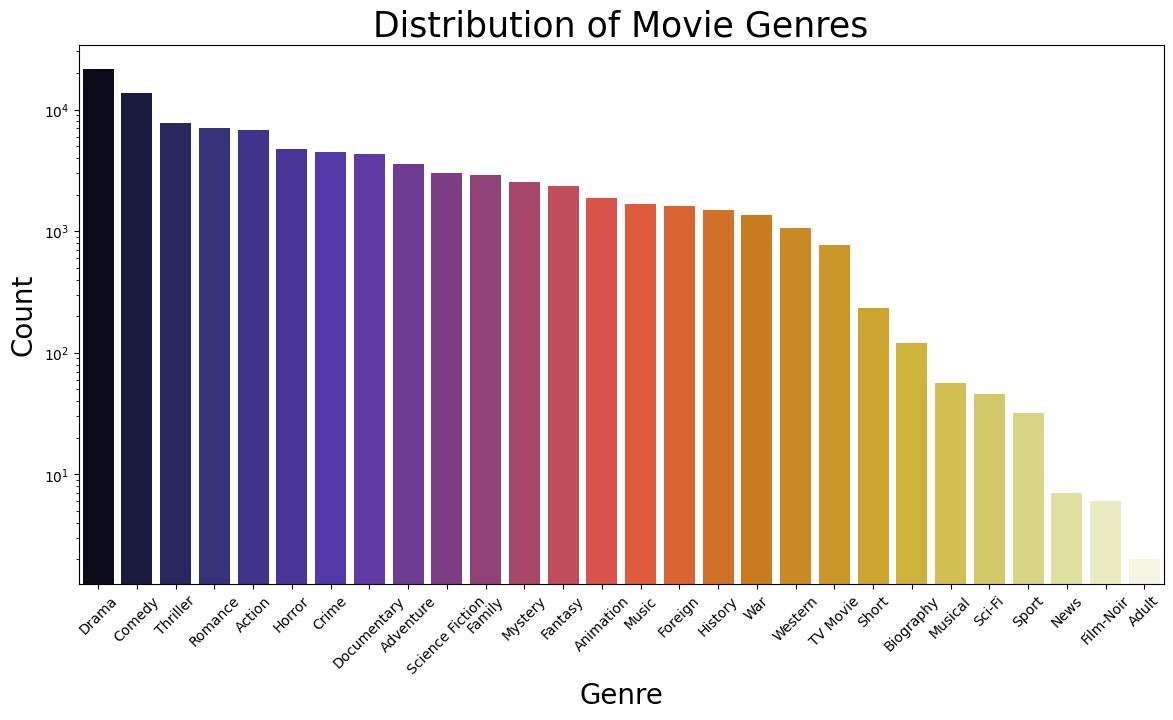

In [14]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x='Genre', y='Movie Count', data=genre_df, palette='CMRmap')
plt.xticks(rotation=45)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.yscale('log')
plt.show()

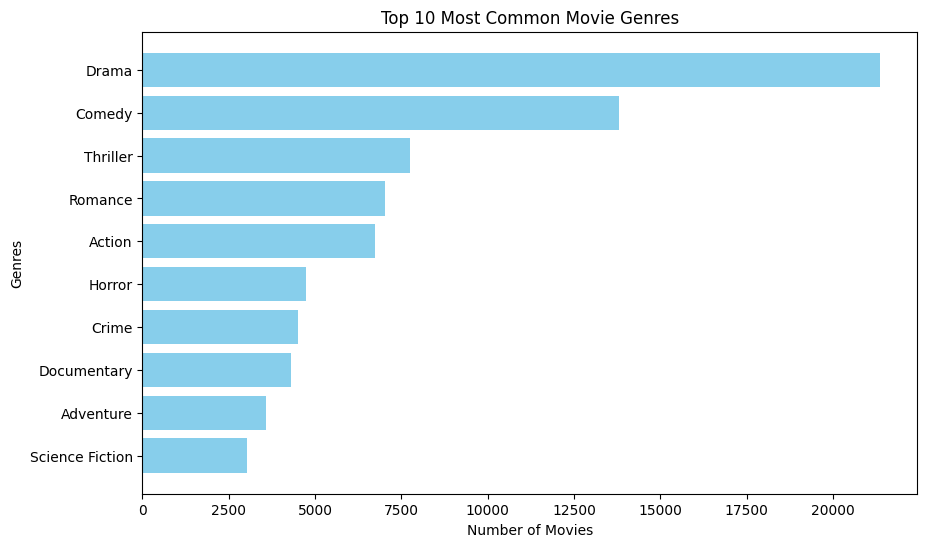

In [229]:
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(genre_df['Genre'][:10], genre_df['Count'][:10], color='skyblue')
plt.xlabel("Number of Movies")
plt.ylabel("Genres")
plt.title("Top 10 Most Common Movie Genres")
plt.gca().invert_yaxis()
plt.show()

#### **1.3.1.1.2 Actors**

The Top 10 Most Frequent Actors in Movies:

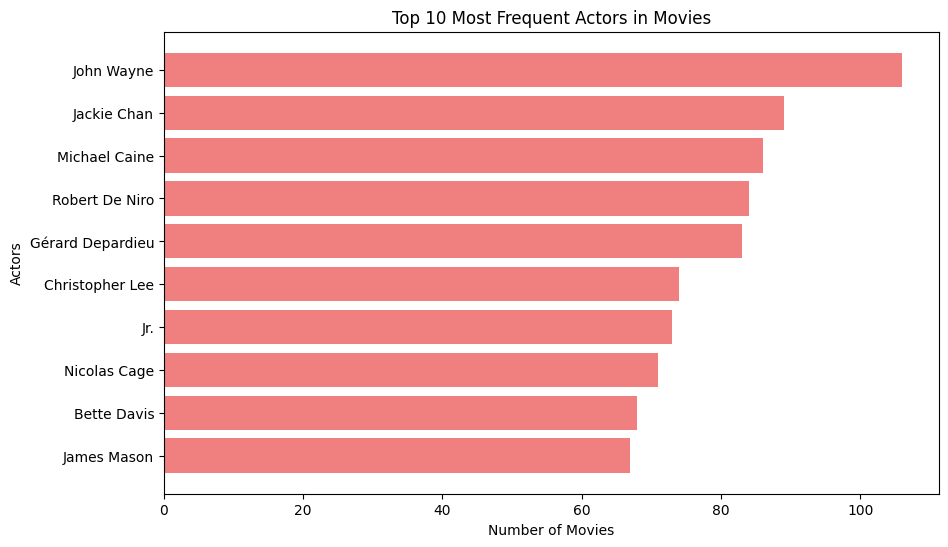

In [235]:
actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)
# Exclude "No Actor" and sort by count
actor_df = actor_df[actor_df['Actor'] != "No Actor"]

plt.figure(figsize=(10,6))
plt.barh(actor_df['Actor'][:10], actor_df['Count'][:10], color='lightcoral')
plt.xlabel("Number of Movies")
plt.ylabel("Actors")
plt.title("Top 10 Most Frequent Actors in Movies")
plt.gca().invert_yaxis()
plt.show()

Now, we want to create:

1. A DataFrame with all actors and their total number of movies.
2. A separate column for each genre, counting how many times an actor appeared in that genre.
Each genre column tracks how many times an actor appeared in a movie of that genre.

In [37]:
# import pandas as pd

# # Create a DataFrame with actor counts (Number of movies per actor)
# actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Total Movies'])

# # Initialize genre columns with zeros
# for genre in unique_genres:
#     actor_df[genre] = 0

# # Iterate through movies dataset to count genre appearances for each actor
# for _, row in movies.iterrows():
#     if pd.notna(row['first_three_actors']) and pd.notna(row['genres']):
#         actors = row['first_three_actors'].split(', ')
#         genres = row['genres'].split(', ')
#         for actor in actors:
#             if actor in actor_df['Actor'].values:
#                 for genre in genres:
#                     actor_df.loc[actor_df['Actor'] == actor, genre] += 1
# print(actor_df)

                Actor  Total Movies  Crime  Romance  War  Documentary  \
0           Tom Hanks            52      6        9    3            5   
1           Tim Allen            26      1        1    0            1   
2         Don Rickles             5      0        0    1            1   
3      Robin Williams            54      3        7    1            1   
4       Jonathan Hyde             3      0        0    0            0   
...               ...           ...    ...      ...  ...          ...   
48264     Perry Dizon             1      0        0    0            0   
48265   Hazel Orencio             1      0        0    0            0   
48266   Erika Eleniak             1      0        0    0            0   
48267   Julie du Page             1      0        0    0            0   
48268    Pavel Pavlov             1      0        0    0            0   

       Animation  Western  Biography  Music  ...  Fantasy  TV Movie  Sci-Fi  \
0              7        0          0      0 

In [39]:
# # Save the actor DataFrame to a CSV file
# actor_df.to_csv("./data/actor_genre_counts.csv", index=False)

Load actor_df from here:

In [51]:
# actor_df = pd.read_csv('./data/actor_genre_counts.csv')

Now, we can get top N actors who have appeared most in a given genre using our `actor_df`:

In [40]:
def top_actors_by_genre(genre, top_n=10):
    if genre not in actor_df.columns:
        print(f"Genre '{genre}' not found in the dataset.")
        return
    
    # Filter and sort actors by the given genre count
    top_actors = actor_df[['Actor', genre]].sort_values(by=genre, ascending=False).head(top_n)
    
    print(f"\nTop {top_n} Actors in {genre} Movies:\n" + "-"*40)
    print(top_actors.to_string(index=False))

top_actors_by_genre("Action", 10)  # Replace "Action" with any genre


Top 10 Actors in Action Movies:
----------------------------------------
                Actor  Action
          Jackie Chan      79
           John Wayne      50
       Dolph Lundgren      48
        Steven Seagal      43
Jean-Claude Van Damme      40
               Jet Li      39
           Sammo Hung      35
         Bruce Willis      32
       Shintarô Katsu      31
   Sylvester Stallone      30


We can also plot a bar chart for the top N actors who have appeared most in a given genre:

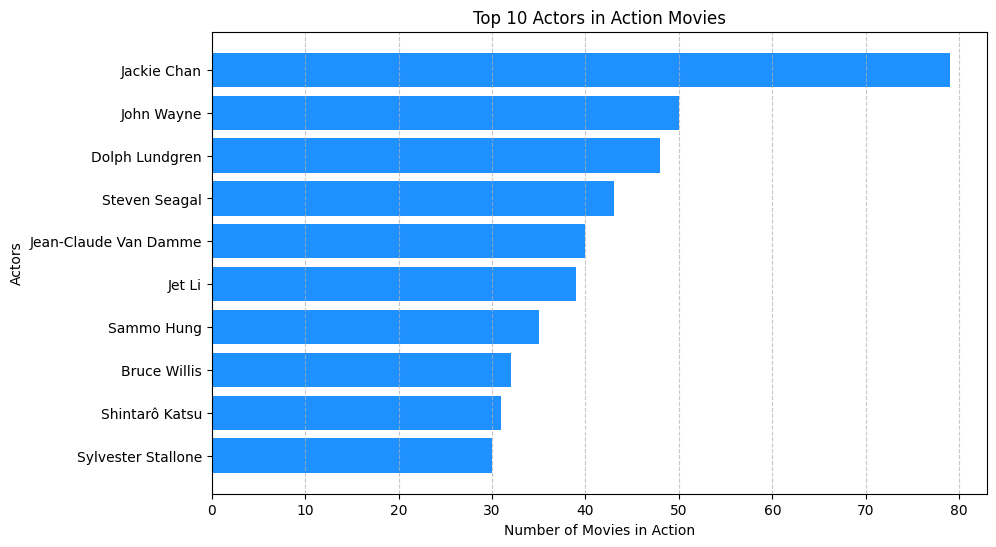

In [41]:
def visualize_top_actors_by_genre(genre, top_n=10):
    if genre not in actor_df.columns:
        print(f"Genre '{genre}' not found in the dataset.")
        return
    
    # Filter and sort actors by the given genre count
    top_actors = actor_df[['Actor', genre]].sort_values(by=genre, ascending=False).head(top_n)

    # Plot bar chart
    plt.figure(figsize=(10,6))
    plt.barh(top_actors['Actor'], top_actors[genre], color='dodgerblue')
    plt.xlabel(f"Number of Movies in {genre}")
    plt.ylabel("Actors")
    plt.title(f"Top {top_n} Actors in {genre} Movies")
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

visualize_top_actors_by_genre("Action", 10)  # Replace "Action" with any genre

We can develop the previously defined function to return the top N actors who have appeared most frequently across multiple genres combined.

In [59]:
def top_actors_by_multiple_genres(genres, top_n=10):
    missing_genres = [genre for genre in genres if genre not in actor_df.columns]
    if missing_genres:
        print(f"The following genres were not found: {', '.join(missing_genres)}")
        return
    
    # Sum the occurrences of selected genres for each actor
    actor_genre_counts = actor_df[['Actor'] + genres].copy()
    actor_genre_counts['Total Count'] = actor_genre_counts[genres].sum(axis=1)
    
    # Sort by the total count and select top actors
    top_actors = actor_genre_counts[['Actor', 'Total Count']].sort_values(by='Total Count', ascending=False).head(top_n)
    
    print(f"\nTop {top_n} Actors in {', '.join(genres)} Movies:\n" + "-"*50)
    print(top_actors.to_string(index=False))

top_actors_by_multiple_genres(["Action", "Comedy"], 10)  # Replace genres with any selection


Top 10 Actors in Action, Comedy Movies:
--------------------------------------------------
        Actor  Total Count
  Jackie Chan          127
 Bruce Willis           60
  Bud Spencer           58
   John Wayne           58
Michael Caine           58
Burt Reynolds           57
 Akshay Kumar           53
       Jet Li           51
   Sammo Hung           50
 Eddie Murphy           50


#### **1.3.1.1.3 Spoken Language**

Top 10 Most Common Spoken Languages:

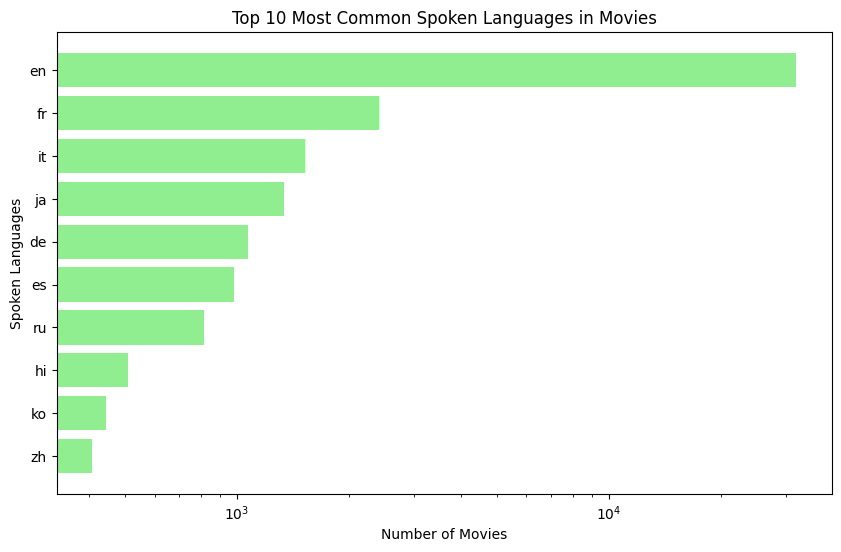

In [233]:
language_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(language_df['Language'][:10], language_df['Count'][:10], color='lightgreen')  # Different color for clarity
plt.xlabel("Number of Movies")
plt.ylabel("Spoken Languages")
plt.title("Top 10 Most Common Spoken Languages in Movies")
plt.xscale('log')
plt.gca().invert_yaxis()
plt.show()

#### **1.3.1.1.4 Production Countries**

Let's take a look at **production countries** and see how many unique country combinations exist?

In [236]:
num_unique_countries = movies['production_countries'].nunique()
print(f"Number of unique production country combinations: {num_unique_countries}")

Number of unique production country combinations: 2385


If we want to count how many times each country appears individually:

In [313]:
from collections import Counter

# Flatten and count occurrences of each individual country
country_counts = Counter(country.strip() for countries in movies['production_countries'].dropna() for country in countries.split(', '))

# We can use the previously defined function for printing results
print_top_counts(country_counts, "Production Countries", top_n=20)


------------------------------------------------------------
Top 20 Production Countries (Based on Frequency Count):
------------------------------------------------------------
1. United States of America: 21061 times
2. Unknown: 6077 times
3. United Kingdom: 4067 times
4. France: 3901 times
5. Germany: 2239 times
6. Italy: 2164 times
7. Canada: 1745 times
8. Japan: 1635 times
9. Spain: 962 times
10. Russia: 901 times
11. India: 825 times
12. Hong Kong: 596 times
13. Sweden: 586 times
14. Australia: 567 times
15. South Korea: 493 times
16. Belgium: 445 times
17. Denmark: 382 times
18. Finland: 381 times
19. Netherlands: 374 times
20. China: 372 times
------------------------------------------------------------



 to visualize the top 10 most common production countries in movies:

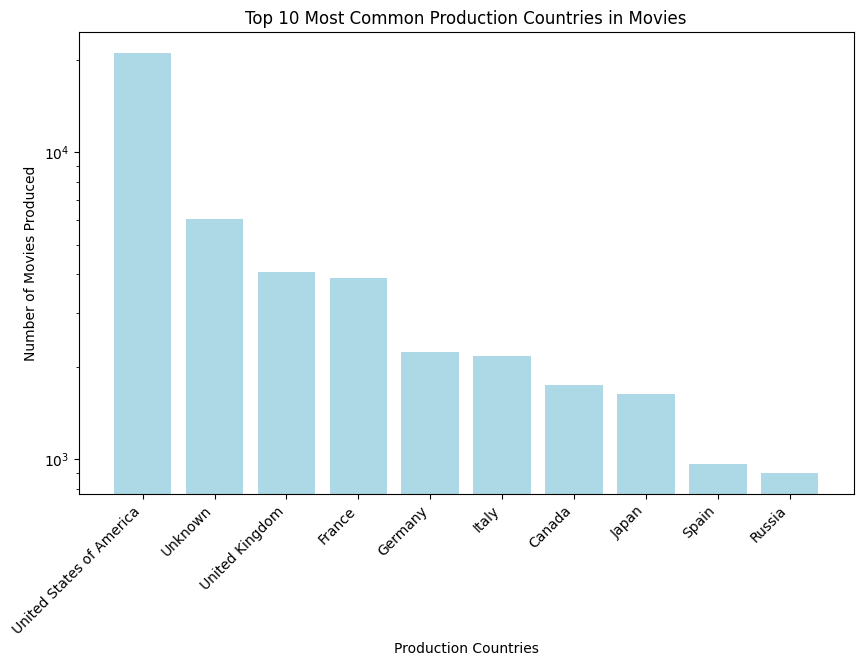

In [314]:
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(country_df['Country'][:10], country_df['Count'][:10], color='lightblue')
plt.xlabel("Production Countries")
plt.ylabel("Number of Movies Produced")
plt.title("Top 10 Most Common Production Countries in Movies")
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()

#### **1.3.1.1.5 Directors**

let's do the same for directors, counting how many times each director appears in the dataset.

In [315]:
from collections import Counter

# Flatten and count occurrences of each director
director_counts = Counter(director.strip() for director in movies['director'].dropna())

# Use the function to print the top 20 most frequent directors
print_top_counts(director_counts, "Directors", top_n=20)


------------------------------------------------------------
Top 20 Directors (Based on Frequency Count):
------------------------------------------------------------
1. John Ford: 66 times
2. Michael Curtiz: 65 times
3. Werner Herzog: 53 times
4. Alfred Hitchcock: 53 times
5. Woody Allen: 49 times
6. Jean-Luc Godard: 47 times
7. Sidney Lumet: 46 times
8. Georges Méliès: 46 times
9. Charlie Chaplin: 44 times
10. Raoul Walsh: 43 times
11. William A. Wellman: 42 times
12. Henry Hathaway: 42 times
13. Martin Scorsese: 40 times
14. Richard Thorpe: 40 times
15. Ingmar Bergman: 39 times
16. George Cukor: 38 times
17. John Huston: 38 times
18. Fritz Lang: 38 times
19. Robert Altman: 37 times
20. Mervyn LeRoy: 37 times
------------------------------------------------------------



And now, for top 10 most frequent directors in movies:

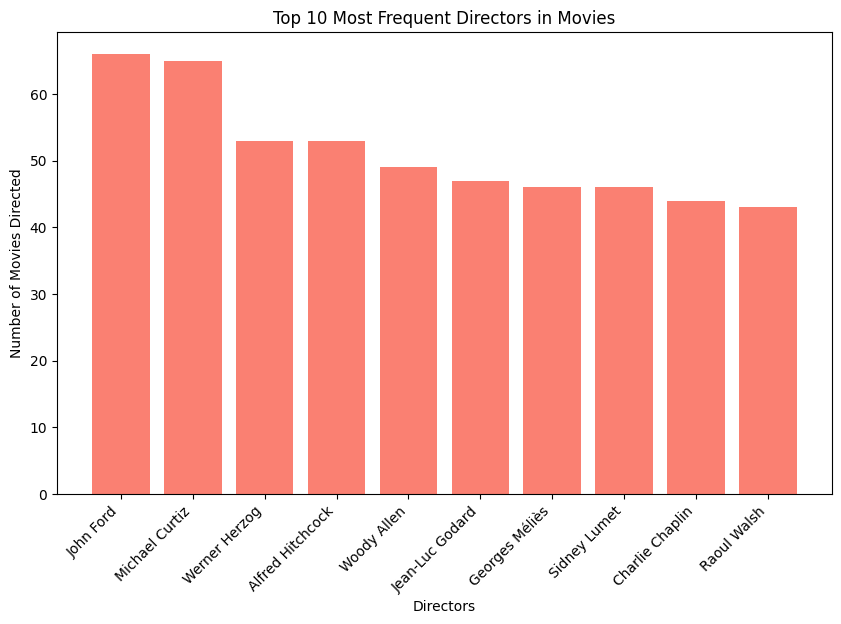

In [316]:
director_df = pd.DataFrame(director_counts.items(), columns=['Director', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(director_df['Director'][:10], director_df['Count'][:10], color='salmon')
plt.xlabel("Directors")
plt.ylabel("Number of Movies Directed")
plt.title("Top 10 Most Frequent Directors in Movies")
plt.xticks(rotation=45, ha='right')
plt.show()

One-hot encoding may become handy later; however, for now it is not helpful

In [20]:
# # One-hot encode genres
# genres_encoded = movies['genres'].str.get_dummies(sep=', ')

# # One-hot encode spoken languages
# languages_encoded = movies['spoken_languages'].str.get_dummies(sep=', ')

# # One-hot encode production countries
# countries_encoded = movies['production_countries'].str.get_dummies(sep=', ')

# # Merge back with the original dataframe
# movies = pd.concat([movies, genres_encoded, languages_encoded, countries_encoded], axis=1)

# # # Display the updated dataframe
# genres_encoded.head()

#### **1.3.1.1.6 Title**

 Let's get an interesting wordcloud to showcase movie titles and the count of ratings to see if we could get any further insight on the movies:

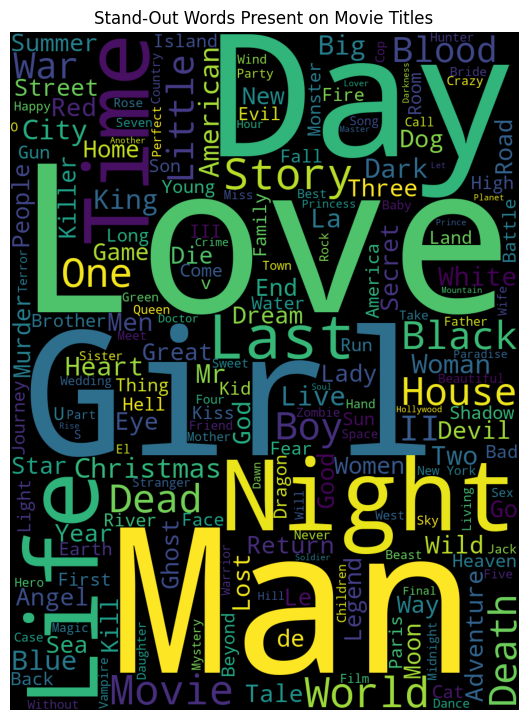

In [20]:
# Wordcloud of movie titles
title = movies['title'] = movies['title'].astype('str')
wordcloud = ' '.join(title)
title_wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'Black',
                            height = 1200, width = 900).generate(wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Stand-Out Words Present on Movie Titles')
plt.tight_layout(pad=0)
plt.show()

## 1.3.2 Numerical Variables 

### 1.3.2.1 Year, Budget, Popularity, Revenue, Runtime,	Vote Average and Vote Count

#### 1.3.2.1.1 Year

Visualization for the distribution of movies by release year:

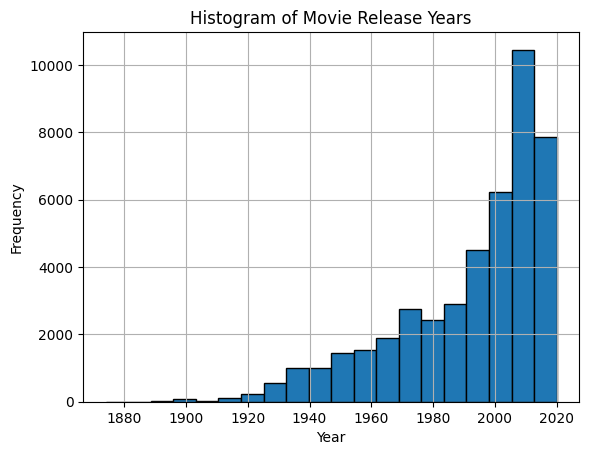

In [244]:
movies["year"].hist(bins=20, edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Histogram of Movie Release Years")
# plt.yscale('log')
plt.show()

In [245]:
# Count the number of unique years in the dataset
num_years = movies['year'].nunique()

print(f"Total number of unique years in the dataset: {num_years}")

Total number of unique years in the dataset: 135


To rank release years by the number of movies produced:

In [246]:
# Count occurrences of each year (number of movies per year)
year_counts = movies['year'].value_counts().reset_index()

# Rename columns for clarity
year_counts.columns = ['Year', 'Movie Count']

# Sort by movie count in descending order
year_counts = year_counts.sort_values(by='Movie Count', ascending=False)

# Display the top years with the highest movie production
print(year_counts.head(10))  # Shows the top 10 years with the most movies


   Year  Movie Count
0  2014         1957
1  2015         1891
2  2013         1874
3  2012         1708
4  2011         1654
5  2016         1593
6  2009         1576
7  2010         1493
8  2008         1458
9  2007         1310


In [247]:
# A function for the number of movies released in the given year
def get_movie_count_by_year(year):
    if year in movies['year'].values:
        count = (movies['year'] == year).sum()
        print(f"Movies released in {year}: {count}")
    else:
        print(f"No movies found for the year {year}.")

# Inster the year:
get_movie_count_by_year(2017)

Movies released in 2017: 530


#### 1.3.2.1.2 Budget

In [248]:
movies['budget'].describe()

count    4.502000e+04
mean     4.262594e+06
std      1.750283e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

- Count: 45,020 → The dataset contains 45,020 movies with recorded budgets.
- Mean (Average Budget): 4,262,594 → The average movie budget is around 4.26 million dollars.
- Standard Deviation (std): 17,502,830 → There is a huge variation in budgets, with some movies having very high budgets while others have almost none.
- Minimum Budget (min): 0 → Some movies have no recorded budget.
- 25th Percentile (Q1): 0 → 25% of movies have a budget of zero (likely missing data or low-budget films).
- 50th Percentile (Median, Q2): $0 → 50% of movies (the median) have a budget of zero, confirming that a large portion of the dataset lacks budget data.
- 75th Percentile (Q3): 0 → Even 75% of movies have a budget of zero, suggesting serious data gaps.
- Maximum Budget (max): 380,000,000 → The highest budget recorded in the dataset is 380 million dollars (likely a blockbuster ovie).


In [249]:
# Count the number of movies with a budget of 0
zero_budget_count = (movies['budget'] == 0).sum()

print(f"Number of movies with a budget of 0 (no budget data): {zero_budget_count}")

Number of movies with a budget of 0 (no budget data): 36155


Movies for which budget information is unavailable are assigned a value of zero. A considerable number of 34507 movies lack budget data.

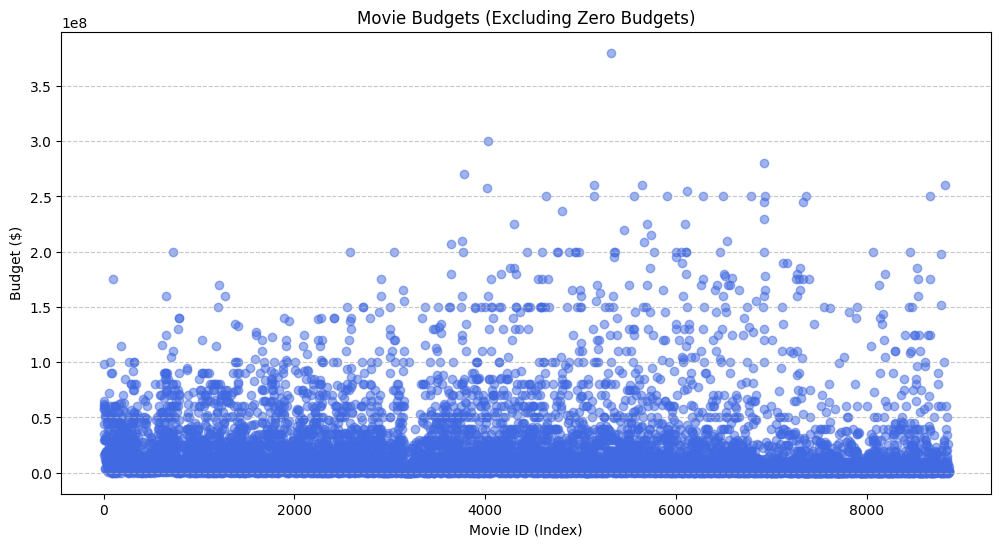

In [393]:
import matplotlib.ticker as ticker

# Filter out movies with a budget of zero
non_zero_budget_movies = movies[movies["budget"] > 0]

non_zero_budget_movies = non_zero_budget_movies.reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(non_zero_budget_movies.index, non_zero_budget_movies["budget"], color="royalblue", alpha=0.5)

# # Format y-axis to show full numbers
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.xlabel("Movie ID (Index)")
plt.ylabel("Budget ($)")
plt.title("Movie Budgets (Excluding Zero Budgets)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.yscale('log')
plt.show()

In [263]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45020 entries, 0 to 45019
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45020 non-null  int64  
 1   title_x               45020 non-null  object 
 2   year                  45020 non-null  int64  
 3   genres                45020 non-null  object 
 4   first_three_actors    45020 non-null  object 
 5   director              45020 non-null  object 
 6   original_language     45020 non-null  object 
 7   imdb_id               45020 non-null  object 
 8   title_y               45020 non-null  object 
 9   popularity            45020 non-null  float64
 10  production_countries  45020 non-null  object 
 11  revenue               45020 non-null  float64
 12  runtime               44777 non-null  float64
 13  budget                45020 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 4.8+ MB


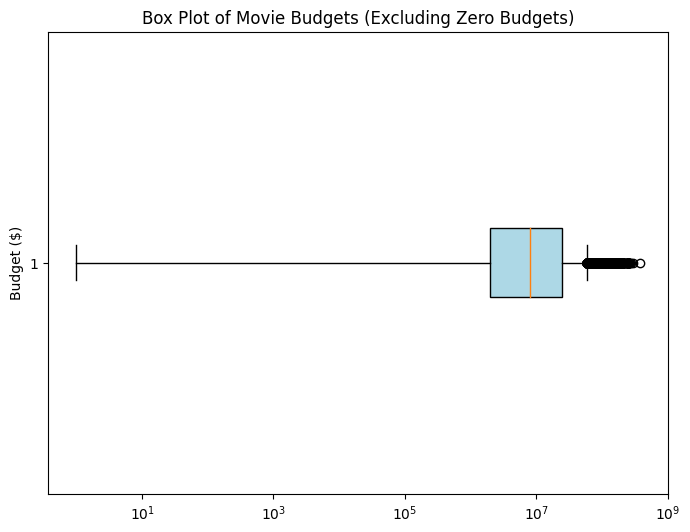

In [259]:
# Filter out movies with a budget of zero
non_zero_budget_movies = movies[movies["budget"] > 0]
plt.figure(figsize=(8, 6))
plt.boxplot(non_zero_budget_movies["budget"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.ylabel("Budget ($)")
plt.title("Box Plot of Movie Budgets (Excluding Zero Budgets)")
plt.xscale('log')
plt.show()

In [260]:
# Filter out zero budgets for better analysis
non_zero_budgets = movies[movies["budget"] > 0]["budget"]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(non_zero_budgets, 25)
Q3 = np.percentile(non_zero_budgets, 75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = non_zero_budgets[(non_zero_budgets < lower_bound) | (non_zero_budgets > upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")
print("Sample outlier budgets:", outliers.head(10).tolist())

Number of outliers detected: 930
Sample outlier budgets: [65000000, 60000000, 62000000, 98000000, 60000000, 72000000, 60000000, 100000000, 90000000, 90000000]


**Top 10 Expensive Movies:**

In [309]:
# Filter the original movies dataframe to match the outlier budgets
expensive_movies = movies[movies["budget"].isin(outliers)]

# Select relevant columns: movie title, budget, and main actors
expensive_movies_info = expensive_movies[['title', 'budget', 'first_three_actors']]

# Sort by budget in descending order for better insights
expensive_movies_info = expensive_movies_info.sort_values(by="budget", ascending=False)

print("Most Expensive Movies and Their Actors:")
expensive_movies_info.head(10)

Most Expensive Movies and Their Actors:


,title,budget,first_three_actors
17087,Pirates of the Caribbean: On Stranger Tides,380000000,"Johnny Depp, Penélope Cruz, Ian McShane"
11817,Pirates of the Caribbean: At World's End,300000000,"Johnny Depp, Orlando Bloom, Keira Knightley"
26417,Avengers: Age of Ultron,280000000,"Robert Downey Jr., Chris Hemsworth, Mark Ruffalo"
11057,Superman Returns,270000000,"Brandon Routh, Kevin Spacey, Kate Bosworth"
16097,Tangled,260000000,"Mandy Moore, Zachary Levi, Donna Murphy"
44424,Transformers: The Last Knight,260000000,"Mark Wahlberg, Josh Duhamel, Laura Haddock"
18635,John Carter,260000000,"Taylor Kitsch, Lynn Collins, Samantha Morton"
11770,Spider-Man 3,258000000,"Tobey Maguire, Kirsten Dunst, James Franco"
21096,The Lone Ranger,255000000,"Johnny Depp, Armie Hammer, William Fichtner"
23256,X-Men: Days of Future Past,250000000,"Hugh Jackman, James McAvoy, Michael Fassbender"


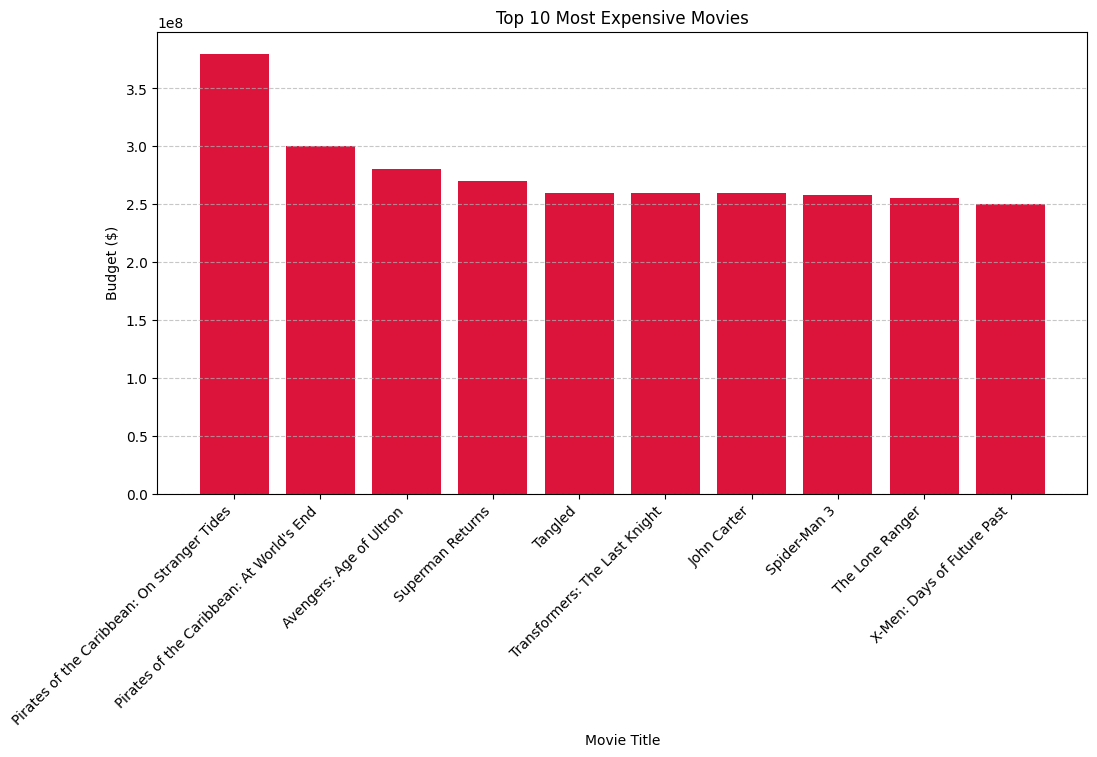

In [311]:
# Select top 10 most expensive movies for visualization
top_expensive_movies = expensive_movies_info.head(10)  # Ensure they are sorted by budget
plt.figure(figsize=(12, 6))
plt.bar(top_expensive_movies['title'], top_expensive_movies['budget'], color='crimson')
plt.xlabel("Movie Title")
plt.ylabel("Budget ($)")
plt.title("Top 10 Most Expensive Movies")
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')) # Format y-axis to show full numbers instead of scientific notation
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.yscale('log')
plt.show()

#### 1.3.2.1.3 Revenue

In [317]:
movies['revenue'].describe()

count    4.502000e+04
mean     1.131500e+07
std      6.463556e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

- Mean (Average Revenue): 11.31 million.  
  The average movie revenue is 11.31 million, but very high-budget films may skew this.

- Standard Deviation (std): 64.64 million.  
  There is a significant variation in revenue, suggesting that some movies made significantly more than others.

- Minimum Revenue: 0.  
  Some movies recorded no revenue, possibly due to missing data, unreleased films, or very low earnings.

- 25th Percentile (Q1): 0.  
  25% of movies made no revenue (suggesting a large amount of missing data).

- 50th Percentile (Median, Q2): 0.  
  The median revenue is also 0, meaning that at least 50% of the movies have no revenue recorded.

- 75th Percentile (Q3): 0.  
  Even 75% of the movies have zero revenue in the dataset.

- Maximum Revenue: 2.79 billion.  
  The highest-grossing movie in the dataset made $2.79 billion, which is likely a major Hollywood blockbuster (e.g., "Avengers").


In [63]:
# Count the number of movies with a revenue of 0
zero_revenue_count = (movies['revenue'] == 0).sum()

print(f"Number of movies with a revenue of 0 (no revenue data): {zero_revenue_count}")

Number of movies with a revenue of 0 (no revenue data): 35957


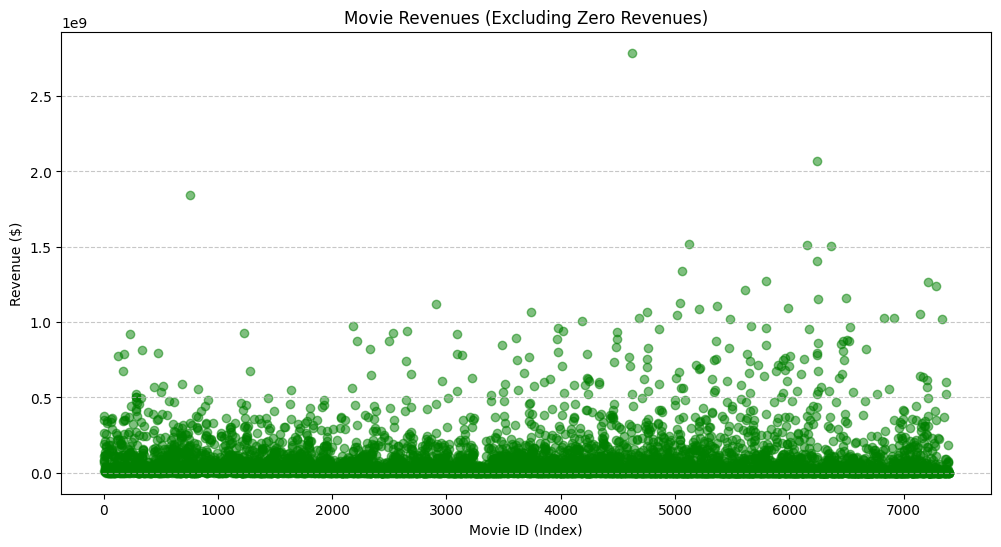

In [320]:
import matplotlib.ticker as ticker

# Filter out movies with a revenue of zero
non_zero_revenue_movies = movies[movies["revenue"] > 0]

non_zero_revenue_movies = non_zero_revenue_movies.reset_index()

# Scatter plot for revenue distribution
plt.figure(figsize=(12, 6))
plt.scatter(non_zero_revenue_movies.index, non_zero_revenue_movies["revenue"], color="green", alpha=0.5)

# # Format y-axis to show full numbers instead of scientific notation
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.xlabel("Movie ID (Index)")
plt.ylabel("Revenue ($)")
plt.title("Movie Revenues (Excluding Zero Revenues)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.yscale('log')
plt.show()

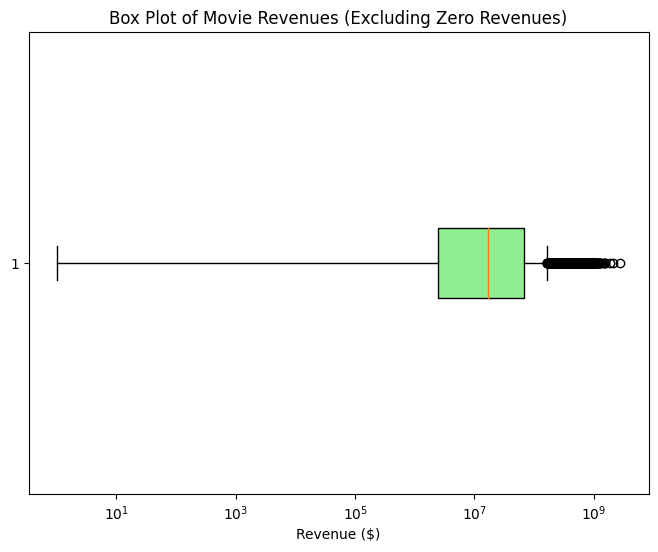

In [321]:
# Filter out movies with a revenue greater than zero
non_zero_revenue_movies = movies[movies["revenue"] > 0]
plt.figure(figsize=(8, 6))
plt.boxplot(non_zero_revenue_movies["revenue"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.xlabel("Revenue ($)")
plt.title("Box Plot of Movie Revenues (Excluding Zero Revenues)")
plt.xscale('log')
plt.show()

In [322]:
# Filter out zero revenues for better analysis
non_zero_revenues = movies[movies["revenue"] > 0]["revenue"]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(non_zero_revenues, 25)
Q3 = np.percentile(non_zero_revenues, 75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = non_zero_revenues[(non_zero_revenues < lower_bound) | (non_zero_revenues > upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")
print("Sample outlier revenues:", outliers.head(10).tolist())

Number of outliers detected: 836
Sample outlier revenues: [373554033.0, 262797249.0, 187436818.0, 352194034.0, 212385533.0, 180000000.0, 168840000.0, 254134910.0, 327311859.0, 346079773.0]


Top 10 Highest Revenue Movies:

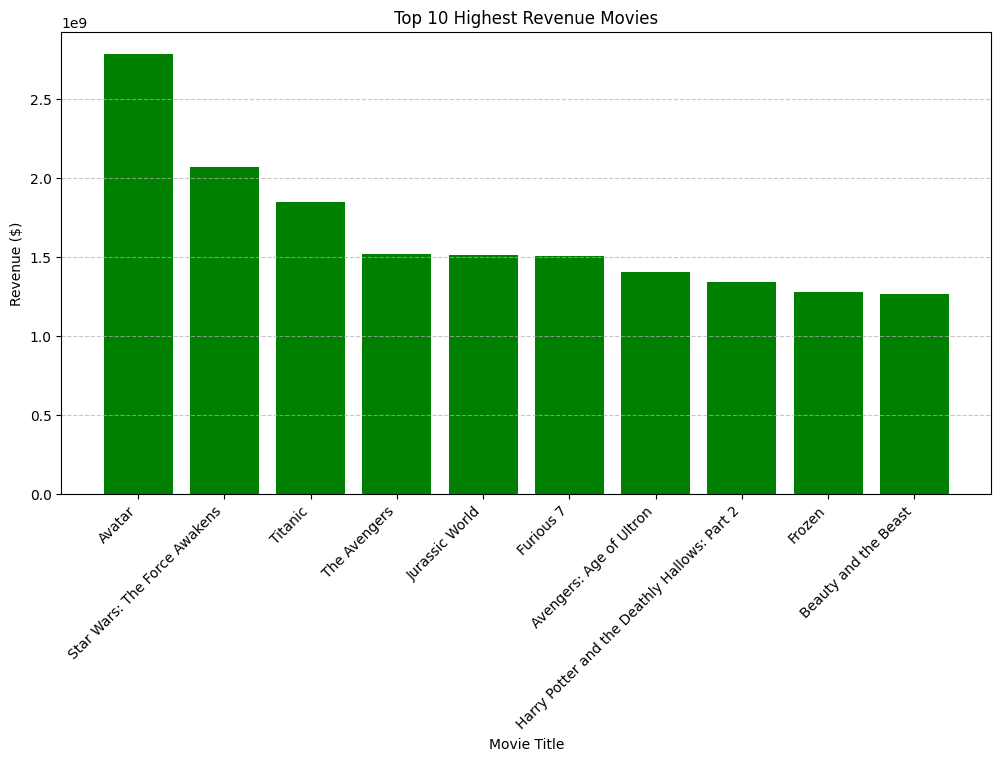

In [328]:
import matplotlib.ticker as ticker

# Select top 10 highest revenue movies for visualization
top_revenue_movies = movies[movies["revenue"] > 0].nlargest(10, "revenue")

plt.figure(figsize=(12, 6))
plt.bar(top_revenue_movies['title'], top_revenue_movies['revenue'], color='green')
plt.xlabel("Movie Title")
plt.ylabel("Revenue ($)")
plt.title("Top 10 Highest Revenue Movies")

# # Format y-axis to show full numbers instead of scientific notation
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
# plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 1.3.2.1.4 Identifying the Most Profitable Movies:

To determine the most financially successful movies, we calculated the earnings for each film by subtracting its budget from its revenue. Since many movies in the dataset have missing or zero values for budget and revenue, we filtered out movies where both values were greater than zero to ensure accurate calculations.

1. First, we filter out movies with missing or zero budget and revenue.

2. second, we can compute the earnings using the formula:
**Earnings = Revenue − Budget**

3. Finally, we should sort movies in descending order based on earnings and display the top 10 highest-earning movies.

This method helps us identify which movies had the highest financial success, providing valuable insights into which films generated the greatest returns relative to their production costs

In [329]:
# Filter movies where both budget and revenue are greater than zero
profitable_movies = movies[(movies["budget"] > 0) & (movies["revenue"] > 0)].copy()

# Calculate earnings (Revenue - Budget)
profitable_movies["earnings"] = profitable_movies["revenue"] - profitable_movies["budget"]

# Sort movies by highest earnings
profitable_movies = profitable_movies.sort_values(by="earnings", ascending=False)

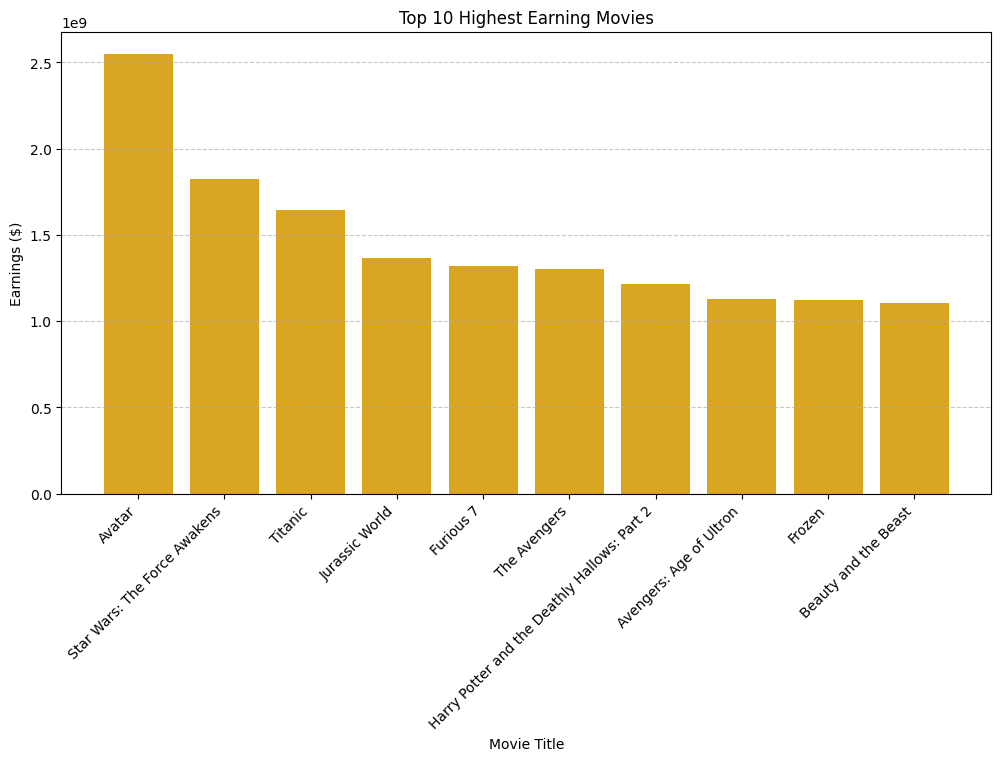

In [331]:
import matplotlib.ticker as ticker

# Select top 10 highest earning movies
top_earning_movies = profitable_movies.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_earning_movies['title'], top_earning_movies['earnings'], color='goldenrod')
plt.xlabel("Movie Title")
plt.ylabel("Earnings ($)")
plt.title("Top 10 Highest Earning Movies")
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')) # Format y-axis to show full numbers instead of scientific notation
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.yscale('log')
plt.show()

It's almost the same; however, For these top 10 movies, Jurassic World was more profitable than The Avengers.

We can use the same formula to get the least profitable movies as well:

In [332]:
# Sort movies by lowest earnings (least profitable movies)
least_profitable_movies = profitable_movies.sort_values(by="earnings", ascending=True)

# Display the top 10 least profitable movies
print("Top 10 Least Profitable Movies:")
print(least_profitable_movies[['title', 'budget', 'revenue', 'earnings']].head(10))

Top 10 Least Profitable Movies:
                                             title     budget     revenue  \
21096                              The Lone Ranger  255000000  89289910.0   
7219                                     The Alamo  145000000  25819961.0   
16753                              Mars Needs Moms  150000000  38992758.0   
43944  Valerian and the City of a Thousand Planets  197471676  90024292.0   
2708                              The 13th Warrior  160000000  61698899.0   
5383                  The Adventures of Pluto Nash  100000000   7103973.0   
1898                                    Metropolis   92620000    650422.0   
14                                Cutthroat Island   98000000  10017322.0   
41165                                Live by Night  108000000  22678555.0   
11366                                 Flushed Away  149000000  64459316.0   

          earnings  
21096 -165710090.0  
7219  -119180039.0  
16753 -111007242.0  
43944 -107447384.0  
2708   -9830110

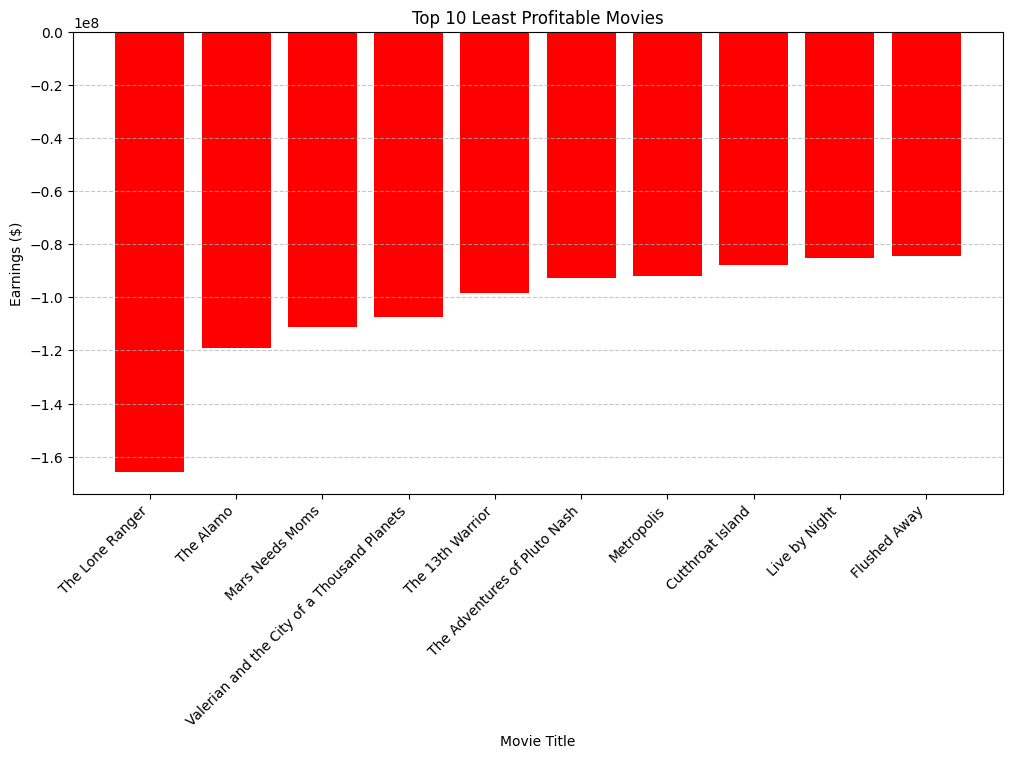

In [334]:
import matplotlib.ticker as ticker

# Select top 10 least profitable movies
top_least_profitable_movies = least_profitable_movies.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_least_profitable_movies['title'], top_least_profitable_movies['earnings'], color='red')
plt.xlabel("Movie Title")
plt.ylabel("Earnings ($)")
plt.title("Top 10 Least Profitable Movies")
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.yscale('log')
plt.show()

#### 1.3.2.1.5 Runtime

In [335]:
movies['runtime'].describe()

count    44777.000000
mean        94.518369
std         37.531231
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

- Mean (Average Runtime): 94.5 minutes  
  The average movie length is about 94.5 minutes, which is typical for feature films.

- Standard Deviation (std): 37.53 minutes  
  There is some variation in runtime, with many movies having shorter or longer durations.

- Minimum Runtime: 0 minutes  
  Some entries have missing or incorrect data (movies cannot have 0 runtime).

- 25th Percentile (Q1): 85 minutes  
  25% of movies are shorter than 85 minutes.

- 50th Percentile (Median, Q2): 95 minutes  
  The median runtime is 95 minutes, meaning half the movies are shorter than 95 minutes and half are longer.

- 75th Percentile (Q3): 107 minutes  
  75% of movies are shorter than 107 minutes.

- Maximum Runtime: 1,256 minutes  
  This is more than 20 hours, which is highly unusual! It is probably due to a data entry error (either human error or incorrect time reporting).


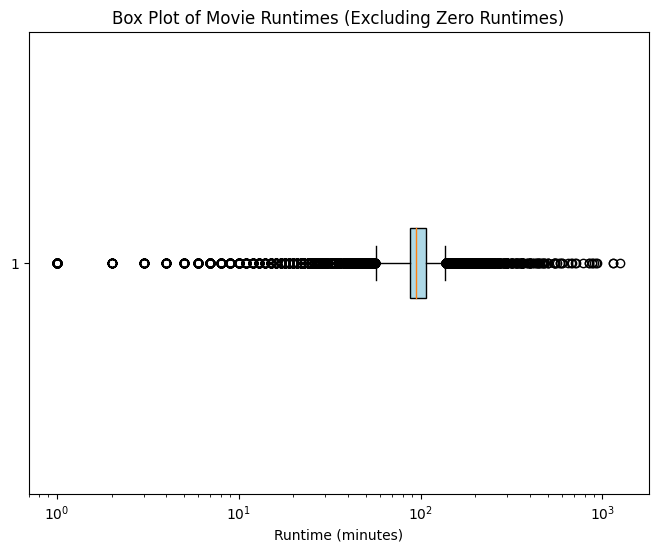

In [336]:
# Filter out movies with zero runtime for better analysis
non_zero_runtime_movies = movies[movies["runtime"] > 0]
plt.figure(figsize=(8, 6))
plt.boxplot(non_zero_runtime_movies["runtime"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xlabel("Runtime (minutes)")
plt.title("Box Plot of Movie Runtimes (Excluding Zero Runtimes)")
plt.xscale('log')
plt.show()

In [337]:
# Filter out zero runtimes for better analysis
non_zero_runtimes = movies[movies["runtime"] > 0]["runtime"]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(non_zero_runtimes, 25)
Q3 = np.percentile(non_zero_runtimes, 75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = non_zero_runtimes[(non_zero_runtimes < lower_bound) | (non_zero_runtimes > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print("Sample outlier runtimes:", outliers.head(10).tolist())

Number of outliers detected: 4181
Sample outlier runtimes: [170.0, 192.0, 178.0, 50.0, 51.0, 175.0, 177.0, 140.0, 139.0, 145.0]


Some movies have runtimes exceeding 400 minutes, as shown in the graph. We can analyze this data and find movies with specific runtimes. We can get the top N movies with a runtime greater than or equal to the given runtime using code below:

In [338]:
def movies_by_runtime(min_runtime, top_n=10):
    # Filter movies with the specified minimum runtime
    filtered_movies = movies[movies["runtime"] >= min_runtime]

    # Sort movies by runtime in descending/ascending order
    filtered_movies = filtered_movies.sort_values(by="runtime", ascending=True)  # Set to False if you want to get the top movies from the given runtime
    print(f"\nMovies with Runtime ≥ {min_runtime} minutes:\n" + "-"*73)
    print(filtered_movies[['title', 'runtime']].head(top_n).to_string(index=False))

# Find top 10 movies with runtime ≥ 150 minutes
movies_by_runtime(400, 10)  


Movies with Runtime ≥ 400 minutes:
-------------------------------------------------------------------------
                                                         title  runtime
                                     The Count of Monte Cristo    400.0
                                               The Blue Planet    400.0
                                                Les Misérables    400.0
Crystal Lake Memories: The Complete History of Friday the 13th    400.0
                              The Work of Director Spike Jonze    400.0
                                         The Perils of Pauline    410.0
                                              The 10th Kingdom    417.0
                                                 War and Peace    422.0
                                                   The Keepers    432.0
                                                      11.22.63    432.0


Judging by the names of these movies, we can say that they mostly belong to the documentary genre.

#### 1.3.2.1.6 Popularity

Popularity: A score based on views, searches, or other metrics (higher is more popular).

In [88]:
movies['popularity'].describe()

count    43337.000000
mean         3.048701
std          6.120853
min          0.000000
25%          0.443563
50%          1.216830
75%          3.970538
max        547.488298
Name: popularity, dtype: float64

- Mean (Average Popularity): 3.05  
  The average popularity score is 3.05, indicating that most movies have relatively low popularity.

- Standard Deviation (std): 6.12  
  There is a wide variation in popularity scores, with some movies having much higher popularity than others.

- Minimum Popularity: 0.00  
  Some movies have a popularity score of 0, meaning they likely received little to no attention.

- 25th Percentile (Q1): 0.44  
  25% of movies have a popularity score below 0.44, showing that a significant portion of movies are not widely recognized.

- 50th Percentile (Median, Q2): 1.22  
  The median popularity is 1.22, meaning that half of the movies have a popularity score below 1.22.

- 75th Percentile (Q3): 3.97  
  75% of movies have a popularity score below 3.97, showing that highly popular movies are relatively rare.

- Maximum Popularity: 547.49  
  The most popular movie in the dataset has a very high popularity score of 547.49, which is an extreme outlier compared to the rest. No additional information is provided regarding how this score is measured.


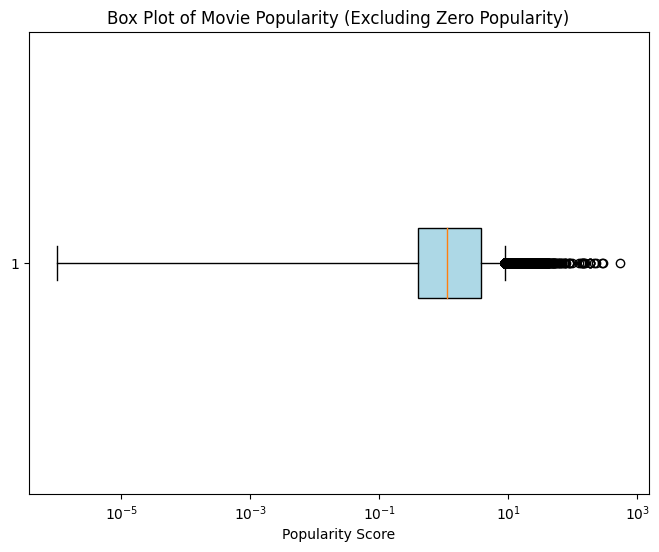

In [339]:
# Filter out movies with zero popularity for better analysis
non_zero_popularity_movies = movies[movies["popularity"] > 0]
plt.figure(figsize=(8, 6))
plt.boxplot(non_zero_popularity_movies["popularity"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xlabel("Popularity Score")
plt.title("Box Plot of Movie Popularity (Excluding Zero Popularity)")
plt.xscale('log')
plt.show()

In [340]:
# Filter out zero popularity scores for better analysis
non_zero_popularity = movies[movies["popularity"] > 0]["popularity"]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(non_zero_popularity, 25)
Q3 = np.percentile(non_zero_popularity, 75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = non_zero_popularity[(non_zero_popularity < lower_bound) | (non_zero_popularity > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print("Sample outlier popularity scores:", outliers.head(10).tolist())

Number of outliers detected: 4120
Sample outlier popularity scores: [21.946943, 17.015539, 11.7129, 17.924927, 14.686036, 12.140733, 10.137389, 10.673167, 9.026586, 12.669608]


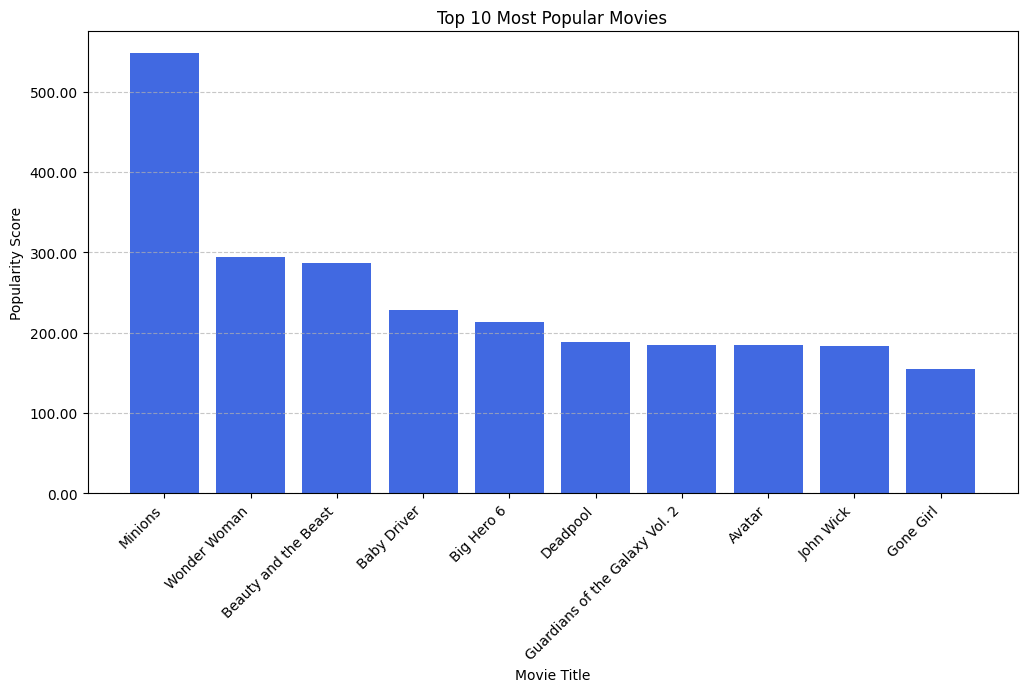

In [341]:
# Select top 10 most popular movies
top_popular_movies = movies.nlargest(10, "popularity")
plt.figure(figsize=(12, 6))
plt.bar(top_popular_movies['title'], top_popular_movies['popularity'], color='royalblue')
plt.xlabel("Movie Title")
plt.ylabel("Popularity Score")
plt.title("Top 10 Most Popular Movies")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.2f}'))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Ratings Dataset

Before we start, we need to downsize the ratings dataset according to the first part of the project (preprocessing phase):

In [29]:
# df3 = pd.read_csv('./data/cleaned_data2.csv')

In [23]:
# ratings = pd.read_csv('./data/ratings.csv')

In [24]:
# # Filter ratings to only include movies that exist in df3
# filtered_ratings = ratings[ratings['movieId'].isin(df3['id'])]

# # Count the number of ratings per user
# user_rating_counts = filtered_ratings['userId'].value_counts()

# # Keep only users who have given at least 20 ratings
# filtered_ratings = filtered_ratings[filtered_ratings['userId'].isin(user_rating_counts[user_rating_counts >= 20].index)]

In [25]:
filtered_ratings

,userId,movieId,rating,timestamp
59,4,223,4.0,1042668576
60,4,415,4.0,1042667925
61,4,648,4.0,1042674800
66,4,1422,4.0,1042674861
68,4,1597,3.0,1042674787
...,...,...,...,...
26024269,270896,48780,5.0,1257031830
26024271,270896,49530,4.0,1257034436
26024278,270896,54001,4.0,1257034331
26024280,270896,54503,4.0,1257033886


In [26]:
# filtered_ratings.to_csv('./data/filtered_ratings.csv', index=False)

Load the downsized or filtered rating dataframe from here:

In [5]:
filtered_ratings = pd.read_csv('./data/filtered_ratings.csv')

In [6]:
# Load our cleaned movie metadata
df3 = pd.read_csv('./data/cleaned_data2.csv')

# Merge filtered_ratings with df3 on movieId = id
merged_df = filtered_ratings.merge(df3, left_on="movieId", right_on="id", how="left")

In [7]:
merged_df.head()

,userId,movieId,rating,timestamp,id,title,year,genres,first_three_actors,director,original_language,imdb_id
0,4,223,4.0,1042668576,223,Rebecca,1940,"Drama, Mystery","Laurence Olivier, Joan Fontaine, George Sanders",Alfred Hitchcock,en,tt0032976
1,4,415,4.0,1042667925,415,Batman & Robin,1997,"Action, Crime, Fantasy","George Clooney, Chris O'Donnell, Arnold Schwar...",Joel Schumacher,en,tt0118688
2,4,648,4.0,1042674800,648,Beauty and the Beast,1946,"Drama, Fantasy, Romance","Jean Marais, Josette Day, Marcel André",Jean Cocteau,fr,tt0038348
3,4,1422,4.0,1042674861,1422,The Departed,2006,"Drama, Thriller, Crime","Leonardo DiCaprio, Matt Damon, Jack Nicholson",Martin Scorsese,en,tt0407887
4,4,1597,3.0,1042674787,1597,Meet the Parents,2000,"Comedy, Romance","Ben Stiller, Robert De Niro, Teri Polo",Jay Roach,en,tt0212338


In [34]:
# Convert genres and first_three_actors to lists
merged_df["genres"] = merged_df["genres"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
merged_df["first_three_actors"] = merged_df["first_three_actors"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])

In [36]:
merged_df.head(1)

,userId,movieId,rating,timestamp,id,title,year,genres,first_three_actors,director,original_language,imdb_id
0,4,223,4.0,1042668576,223,Rebecca,1940,"[Drama, Mystery]","[Laurence Olivier, Joan Fontaine, George Sanders]",Alfred Hitchcock,en,tt0032976


## 4.1 Basic Statistics

In [124]:
# # Convert timestamp to datetime format
# filtered_ratings['date'] = pd.to_datetime(filtered_ratings['timestamp'], unit='s')

In [27]:
# Summary of ratings
filtered_ratings.describe()

,userId,movieId,rating,timestamp
count,1.021275e+07,1.021275e+07,1.021275e+07,1.021275e+07
mean,1.350153e+05,7.198283e+03,3.523867e+00,1.118896e+09
std,7.811213e+04,1.835406e+04,1.056039e+00,2.031393e+08
min,4.000000e+00,2.000000e+00,5.000000e-01,7.896520e+08
25%,6.731200e+04,5.000000e+02,3.000000e+00,9.510109e+08
50%,1.353110e+05,1.484000e+03,3.500000e+00,1.103772e+09
75%,2.025670e+05,3.063000e+03,4.000000e+00,1.268547e+09
max,2.708960e+05,1.762730e+05,5.000000e+00,1.501829e+09


**Rating**
- **Total Ratings Count**: 10,212,750  
  The dataset contains over 10 million individual movie ratings.

- **Mean (Average Rating)**: 3.52  
  The average movie rating given by users is 3.52, indicating that most movies receive mid-range scores.

- **Standard Deviation (std)**: 1.06  
  Ratings vary significantly.

- **Minimum Rating**: 0.5  
  The lowest rating given is 0.5, suggesting a rating system where users can give half-star ratings.

- **25th Percentile (Q1)**: 3.00  
  25% of all ratings are below 3.00, showing that a significant portion of movies receive below-average ratings.

- **50th Percentile (Median, Q2)**: 3.50  
  The median rating is 3.50, meaning half of all ratings are below 3.50, and half are above.

- **75th Percentile (Q3)**: 4.00  
  75% of movies have a rating below 4.00, indicating that highly-rated movies are relatively fewer.

- **Maximum Rating**: 5.00  
  The highest possible rating is 5.00, meaning some movies are rated perfectly by certain users.

- **Timestamp Range**:  
  The timestamps range from **789,652,000 (January 9, 1995) to 1,501,829,000 (August 4, 2017)**, representing the period in which the ratings were recorded.

### 2.1.1 How Many Movies Have Been Highly Rated (Above 4)?

In [358]:
# Compute the average rating per movie
highly_rated_movies = filtered_ratings.groupby("movieId")["rating"].mean()

# Count movies where the average rating is above 4
highly_rated_count = (highly_rated_movies > 4).sum()

print(f"Number of movies with an average rating above 4: {highly_rated_count}")

Number of movies with an average rating above 4: 209


## 2.2 Non-graphical and Graphical Univariate Analysis

In [351]:
# Count unique users and movies
num_users = filtered_ratings['userId'].nunique()
num_movies = filtered_ratings['movieId'].nunique()

print(f"Number of unique users: {num_users}")
print(f"Number of unique movies: {num_movies}")

Number of unique users: 120147
Number of unique movies: 7508


### 2.2.1 Distribution of Ratings

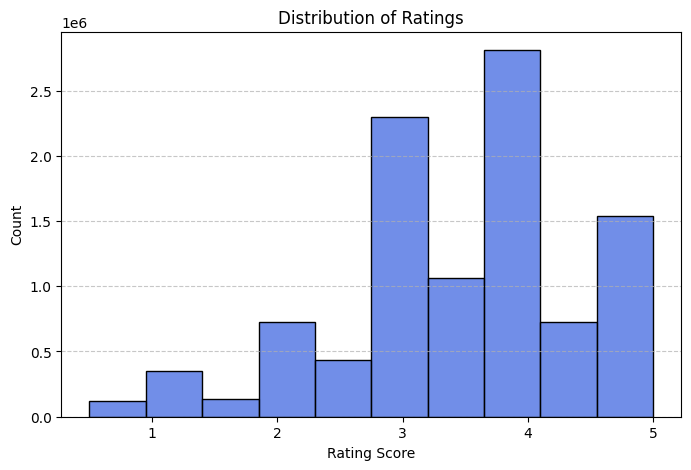

In [353]:
# Plot distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(filtered_ratings['rating'], bins=10, kde=False, color='royalblue')
plt.xlabel("Rating Score")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.2.2 Top Movies with Most Number of Ratings

In [354]:
# Count number of ratings per movie
top_movies = filtered_ratings['movieId'].value_counts().head(10)

print("Top 10 Most Rated Movies:")
print(top_movies)

Top 10 Most Rated Movies:
296    72611
318    67882
593    67694
480    62819
260    59557
110    57051
527    53420
457    50598
150    49086
780    48114
Name: movieId, dtype: int64


Now, we can extract the name of top 10 most-rated movies:

In [355]:
# Get the top 10 most rated movies
top_movies = filtered_ratings['movieId'].value_counts().head(10)

# Extract movie titles from the movies DataFrame
top_movies_with_titles = pd.DataFrame({
    "Movie ID": top_movies.index,
    "Number of Ratings": top_movies.values
}).merge(movies[['id', 'title']], left_on="Movie ID", right_on="id", how="left").drop(columns=["id"])

print("Top 10 Most Rated Movies with Titles:")
print(top_movies_with_titles)

Top 10 Most Rated Movies with Titles:
   Movie ID  Number of Ratings                               title
0       296              72611  Terminator 3: Rise of the Machines
1       318              67882            The Million Dollar Hotel
2       593              67694                             Solaris
3       480              62819                     Monsoon Wedding
4       260              59557                        The 39 Steps
5       110              57051                   Three Colors: Red
6       527              53420                  Once Were Warriors
7       457              50598                               Sissi
8       150              49086                             48 Hrs.
9       780              48114          The Passion of Joan of Arc


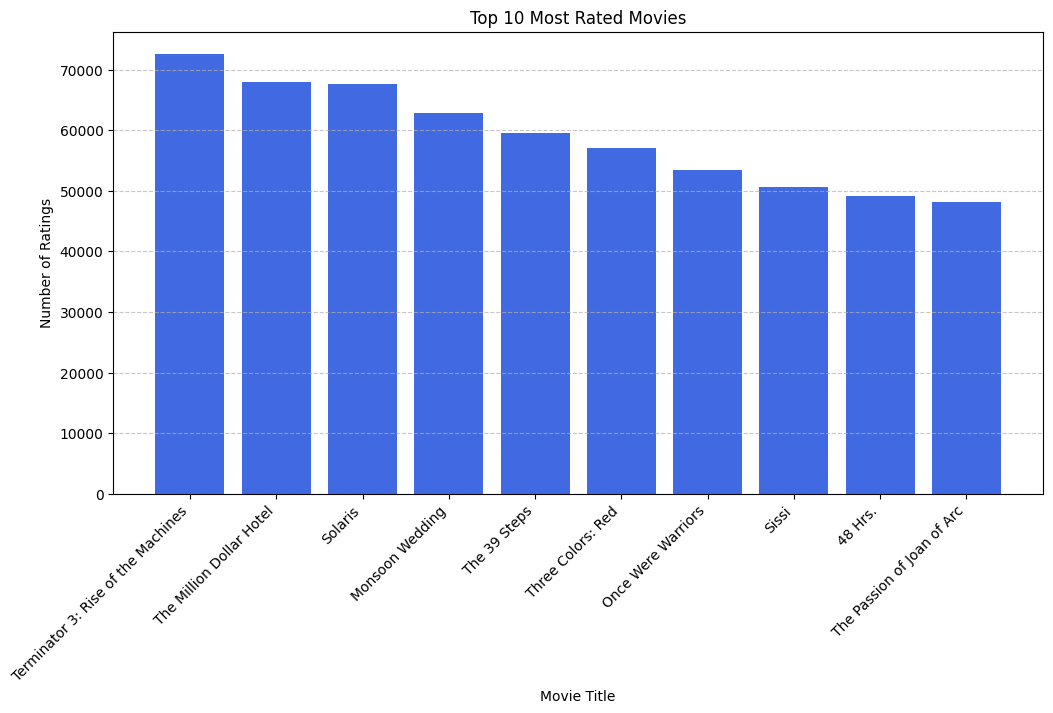

In [356]:
# Plot bar chart for top 10 most rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_movies_with_titles['title'], top_movies_with_titles['Number of Ratings'], color='royalblue')
plt.xlabel("Movie Title")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most Rated Movies")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.2.3 Ranking Movies with Highest Average Ratings:

In [372]:
# Compute the average rating per movie
average_rated_movies = filtered_ratings.groupby("movieId")["rating"].mean()

# Get the top 10 movies based on average rating
top_avg_rated_movies = average_rated_movies.nlargest(10).reset_index()

# Merge with df3 to get movie titles
top_avg_movies_with_titles = top_avg_rated_movies.merge(df3[['id', 'title']], left_on="movieId", right_on="id", how="left")
print(top_avg_movies_with_titles[['title', 'rating']].head(10))

                    title  rating
0               Brannigan     5.0
1  The Man Behind The Gun     5.0
2                 Mystery     5.0
3             Any Day Now     5.0
4                  Brutal     5.0
5    Palermo or Wolfsburg     5.0
6        The Price of Sex     5.0
7     Journey to Planet X     5.0
8             Yellow Rock     5.0
9                  Harvey     5.0


The current approach may not be appropriate to rank the movies:

- A movie with a few high ratings (e.g., 2 ratings of 5.0) might be ranked higher than a movie with thousands of ratings but a slightly lower average.

To address this, we should use a weighted rating formula that considers both the average rating and number of ratings received.

The IMDB Weigheted Rating Formula is:

W = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

- W = Weighted Rating
- R = Average rating for the movie
- v = Number of ratings for the movie
- m = Minimum number of votes required for consideration (e.g., 1009 votes)
- C = Mean rating across all movies

In [366]:
# Compute the average rating and rating count per movie
movie_ratings = filtered_ratings.groupby("movieId").agg(avg_rating=("rating", "mean"),rating_count=("rating", "count"))

m = movie_ratings["rating_count"].quantile(0.90)  # We used 90th percentile as threshold, we can replace it with any number!
C = movie_ratings["avg_rating"].mean()
m

3167.300000000002

It means that 90% of movies in the dataset have received fewer than 3,167 ratings.

Only the top 10% of movies have received more than 3,167 ratings.

This helps set a threshold (m) to filter movies that are widely rated rather than just rated by a few users.

In [369]:
# Define a Function to Compute the Weighted Rating (w)
def weighted_rating(x, m=m, C=C):
    v = x["rating_count"]
    R = x["avg_rating"]
    return ((v / (v + m))* R) + ((m / (v + m)) * C)

movie_ratings["weighted_rating"] = movie_ratings.apply(weighted_rating, axis=1)

# Get the top highly rated movies (weighted)
top_weighted_movies = movie_ratings[movie_ratings["rating_count"] >= m].nlargest(20, "weighted_rating")

# Merge with movie titles from df3
top_movies_with_titles = top_weighted_movies.reset_index().merge(df3[['id', 'title']], left_on="movieId", right_on="id", how="left")
top_movies_with_titles[['title', 'avg_rating', 'rating_count', 'weighted_rating']].head(10)

,title,avg_rating,rating_count,weighted_rating
0,The Million Dollar Hotel,4.420310,67882,4.362317
1,Sleepless in Seattle,4.337575,44633,4.256858
2,Once Were Warriors,4.272211,53420,4.207686
3,License to Wed,4.221014,47135,4.151651
4,Terminator 3: Rise of the Machines,4.173548,72611,4.129488
5,Solaris,4.155915,67694,4.109586
6,The Thomas Crown Affair,4.223435,25616,4.101948
7,Murder She Said,4.219950,25408,4.097965
8,The 39 Steps,4.145961,59557,4.094124
9,The Talented Mr. Ripley,4.173504,30204,4.073458


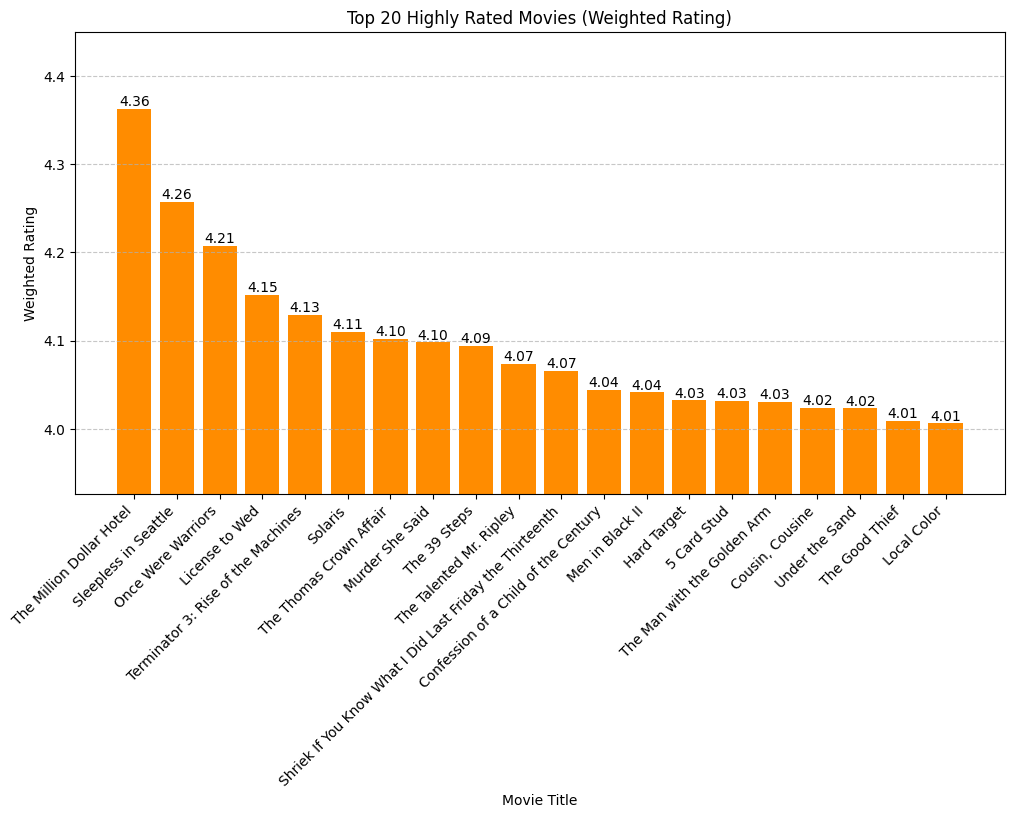

In [367]:
top_movies_with_titles = top_movies_with_titles.sort_values(by="weighted_rating", ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_movies_with_titles['title'], top_movies_with_titles['weighted_rating'], color="darkorange")
plt.xlabel("Movie Title")
plt.ylabel("Weighted Rating")
plt.title("Top 20 Highly Rated Movies (Weighted Rating)")
plt.xticks(rotation=45, ha='right')
plt.ylim(top_movies_with_titles["weighted_rating"].min() * 0.98, top_movies_with_titles["weighted_rating"].max() * 1.02)  # Adjust range to emphasize differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, rating in zip(bars, top_movies_with_titles["weighted_rating"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rating:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

### 2.2.4 Active Users Who Rated the Most Movies

In [373]:
# Count number of ratings per user
top_users = filtered_ratings['userId'].value_counts().head(10)

print("Top 10 Most Active Users (Number of Ratings Given):")
print(top_users)

Top 10 Most Active Users (Number of Ratings Given):
45811     3578
8659      3019
179792    2575
107720    2101
270123    2038
229879    1971
243443    1889
228291    1868
70648     1835
172224    1820
Name: userId, dtype: int64


### 2.2.5 Ratings Over Time

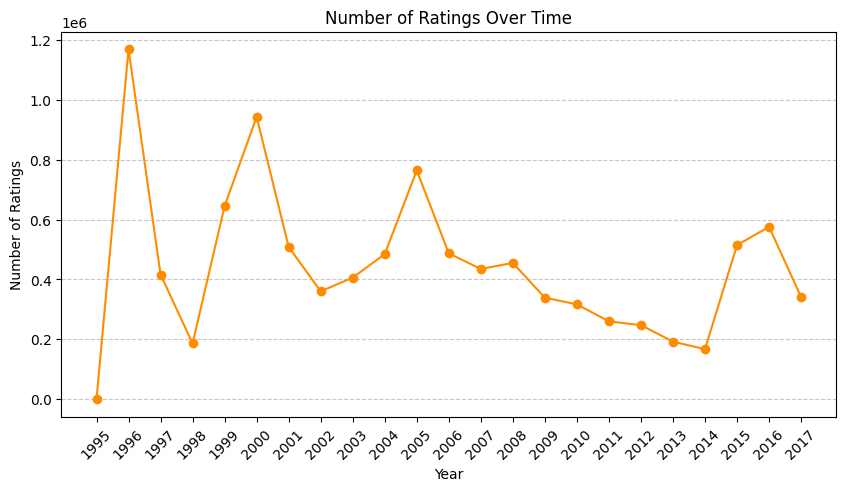

In [377]:
import datetime

# Convert timestamp to datetime
filtered_ratings['date'] = pd.to_datetime(filtered_ratings['timestamp'], unit='s')

# Count ratings per year
ratings_per_year = filtered_ratings.groupby(filtered_ratings['date'].dt.year).size()
plt.figure(figsize=(10, 5))
plt.plot(ratings_per_year.index, ratings_per_year.values, marker='o', color='darkorange')
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.title("Number of Ratings Over Time")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ratings_per_year.index, rotation=45) # To show all years as x-axis labels
plt.show()

**Key Observations**

- Sharp Increase in Early Years (~1995): There is a huge spike around 1995, where the number of ratings peaked at nearly 1.2 million.
This could be due to the introduction of online rating platforms, where early adopters added ratings for older movies.
Websites like IMDb (launched in 1990) and Rotten Tomatoes (launched in 1998) allowed users to rate and review films, contributing to the development of online movie rating systems.

- Rapid Drop After Initial Spike: After the initial peak, there is a sharp decline, likely because early data was influenced by backlogged movie ratings. When an online rating system first becomes available, users often rate both new and old movies they have seen in the past. This leads to a huge spike in ratings in the early years of the platform. So, users rate movies they have already watched over many years (backlog).
After that initial surge, the number of new ratings per year drops because users can only rate new movies as they are released.

- Growth Resurgence (~2000): Around 1998-2000, we see a new peak, possibly due to the rise of popular online movie databases (IMDb, Rotten Tomatoes, etc.).

- Overall Decline (2005-2015): From 2005 to 2015, there is a general decline in the number of ratings per year.This may suggest that users started focusing more on recently released movies instead of rating older films.

## 2.3 User Ratings and Genre

In [ ]:
# Explode genres so each genre has its own row per movie
genre_exploded = merged_df.explode("genres")

# Count the number of times each user watched each genre
user_genre_prefs = genre_exploded.groupby("userId")["genres"].value_counts().unstack(fill_value=0)

In [50]:
# user_genre_prefs.to_csv("user_genre_preferences.csv")

In [37]:
print("User Genre Preferences:")
print(user_genre_prefs.head())

User Genre Preferences:
genres  Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
userId                                                                  
4            4      0          3          0          0       7      4   
7            4      0          3          0          0       5      1   
8           13      0          6          3          0      18     11   
9            4      0          3          0          0      12      6   
11          20      0          9          2          0      22      8   

genres  Documentary  Drama  Family  ...  Mystery  Romance  Sci-Fi  \
userId                              ...                             
4                 1     11       0  ...        2        6       0   
7                 3     10       0  ...        0        1       0   
8                 0     36       5  ...        0        9       0   
9                 0     20       1  ...        3        4       0   
11                0     33       9  ...        8  

In [41]:
# Sum the occurrences of each genre across all users
overall_genre_popularity = user_genre_prefs.sum().sort_values(ascending=False)
print("Overall Genre Popularity:")
print(overall_genre_popularity.head())

Overall Genre Popularity:
genres
Drama       5914820
Comedy      2903171
Thriller    2578644
Action      2022566
Romance     1884723
dtype: int64


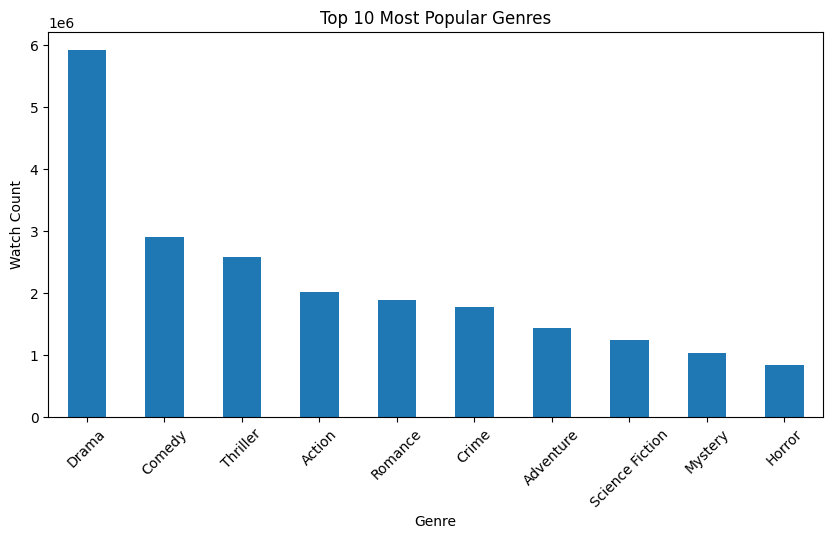

In [42]:
# Plot top 10 most popular genres
overall_genre_popularity.head(10).plot(kind="bar", figsize=(10, 5), title="Top 10 Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Watch Count")
plt.xticks(rotation=45)
plt.show()

Also, if interested, we can determine each user's favorite genre by identifying the most-watched genre for each user:

In [45]:
user_id = 7  # You can change user ID here

# Get the favorite genre of the specific user
favorite_genre = user_favorite_genre.loc[user_id]

print(f"User {user_id}'s Favorite Genre: {favorite_genre}")

User 7's Favorite Genre: Drama


In [ ]:
# # Save to CSV
# user_actor_prefs.to_csv("user_actor_preferences.csv")

## 2.4 Vectorization of Genres, Actors, and Original Language

In [379]:
# Merge ratings with movies to include additional columns
ratings_with_details = filtered_ratings.merge(movies[['id', 'first_three_actors', 'director', 'original_language', 'genres']],
                                              left_on="movieId", right_on="id",how="left")

ratings_with_details.drop(columns=['id'], inplace=True)

# Perform one-hot encoding for genres
genres_encoded = ratings_with_details['genres'].str.get_dummies(sep=', ')

ratings_with_details = pd.concat([ratings_with_details, genres_encoded], axis=1)

# Drop the original 'genres' column as it is now encoded
ratings_with_details.drop(columns=['genres'], inplace=True)
print(ratings_with_details.head())

   userId  movieId  rating   timestamp                date  \
0       4      223     4.0  1042668576 2003-01-15 22:09:36   
1       4      415     4.0  1042667925 2003-01-15 21:58:45   
2       4      648     4.0  1042674800 2003-01-15 23:53:20   
3       4     1422     4.0  1042674861 2003-01-15 23:54:21   
4       4     1597     3.0  1042674787 2003-01-15 23:53:07   

                                  first_three_actors          director  \
0    Laurence Olivier, Joan Fontaine, George Sanders  Alfred Hitchcock   
1  George Clooney, Chris O'Donnell, Arnold Schwar...   Joel Schumacher   
2             Jean Marais, Josette Day, Marcel André      Jean Cocteau   
3      Leonardo DiCaprio, Matt Damon, Jack Nicholson   Martin Scorsese   
4             Ben Stiller, Robert De Niro, Teri Polo         Jay Roach   

  original_language  Action  Adult  ...  Mystery  Romance  Sci-Fi  \
0                en       0      0  ...        1        0       0   
1                en       1      0  ...     

Overall Most Popular Genres:

In [2]:
# # Split the 'first_three_actors' column into separate rows for each actor
# actors_split = ratings_with_details['first_three_actors'].str.get_dummies(sep=', ')
# ratings_with_details = pd.concat([ratings_with_details, actors_split], axis=1)
# ratings_with_details.drop(columns=['first_three_actors'], inplace=True)

In [383]:
# # Save the dataframe to a CSV file
# ratings_with_details.to_csv('./data/ratings_with_details.csv', index=False)

**Load Ratings with details dataframe from here:**

In [3]:
ratings_with_details = pd.read_csv('./data/ratings_with_details.csv')

### 2.4.1 Average Rating Per Genre

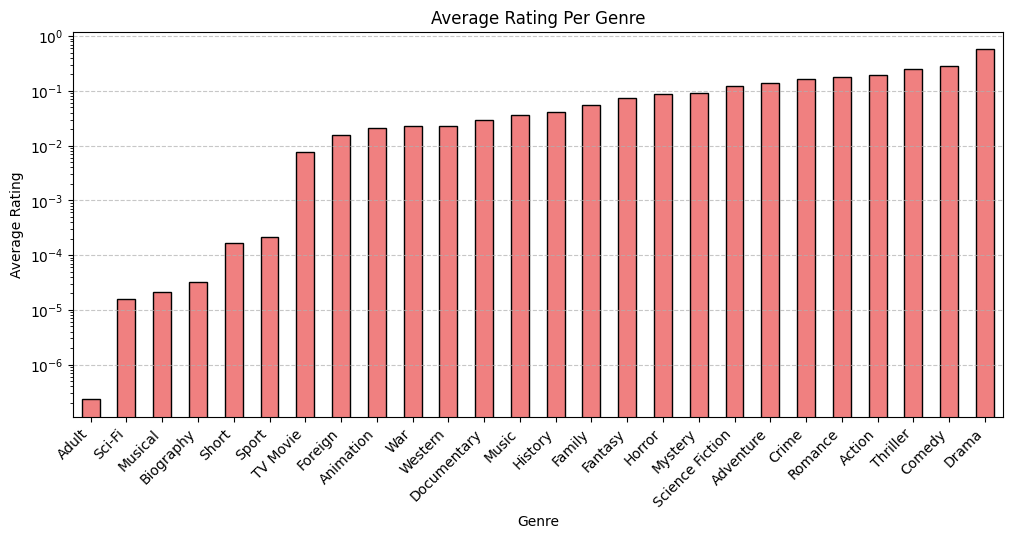

In [384]:
genre_avg_ratings = ratings_with_details.drop(columns=["userId", "movieId", "timestamp", "date", 
                                                       "first_three_actors", "director", "original_language"]).groupby("rating").mean().mean().sort_values()

plt.figure(figsize=(12,5))
genre_avg_ratings.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating Per Genre")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()

### 2.4.2 Average Rating By Spoken Language

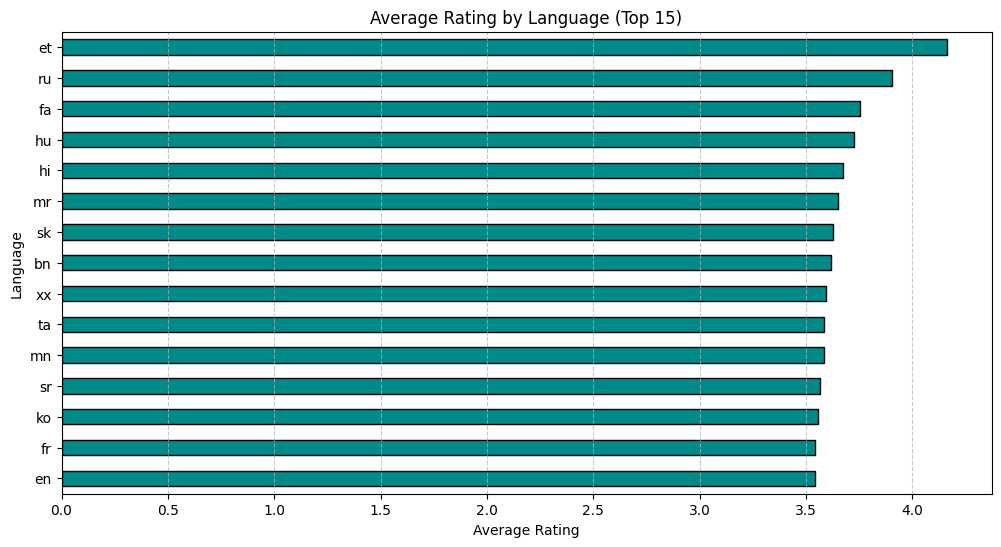

In [386]:
language_avg_rating = ratings_with_details.groupby("original_language")["rating"].mean().sort_values()

plt.figure(figsize=(12,6))
language_avg_rating.tail(15).plot(kind="barh", color="darkcyan", edgecolor="black")
plt.xlabel("Average Rating")
plt.ylabel("Language")
plt.title("Average Rating by Language (Top 15)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()